# Imports

In [1]:
import pandas as pd
from typing import List
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import glob
from omegaconf import OmegaConf
from datetime import datetime
from multiprocessing import Pool
import uncertainty_toolbox as uct
from tqdm import tqdm
import ipywidgets as widgets
from IPython.display import display
from IPython.display import clear_output
import plotly.graph_objects as go
# from uncertainty_toolbox.viz import plot_calibration

# Aggregate Results

In [2]:
tail_path = "/p/project/hai_uqmethodbox/experiment_output/usa_vars_reproduce_ood_tail"

tail_paths = glob.glob(os.path.join(tail_path, "*", "predictions*.csv"))
tail_paths

['/p/project/hai_uqmethodbox/experiment_output/usa_vars_reproduce_ood_tail/usa_vars_repr_BaseModel_SWAGModel_07-13-2023_15-20-46-570485/predictions_60_80.csv',
 '/p/project/hai_uqmethodbox/experiment_output/usa_vars_reproduce_ood_tail/usa_vars_repr_BaseModel_SWAGModel_07-13-2023_15-20-46-570485/predictions_40_60.csv',
 '/p/project/hai_uqmethodbox/experiment_output/usa_vars_reproduce_ood_tail/usa_vars_repr_BaseModel_SWAGModel_07-13-2023_15-20-46-570485/predictions_80_100.csv',
 '/p/project/hai_uqmethodbox/experiment_output/usa_vars_reproduce_ood_tail/usa_vars_repr_BaseModel_SWAGModel_07-13-2023_15-20-46-570485/predictions.csv',
 '/p/project/hai_uqmethodbox/experiment_output/usa_vars_reproduce_ood_tail/usa_vars_repr_DeterministicGaussianModel_DeepEnsembleModel_07-14-2023_11-33-30-562736/predictions_60_80.csv',
 '/p/project/hai_uqmethodbox/experiment_output/usa_vars_reproduce_ood_tail/usa_vars_repr_DeterministicGaussianModel_DeepEnsembleModel_07-14-2023_11-33-30-562736/predictions_40_60.c

In [3]:
def compute_overview_df(paths):
    datetime_format = "%d-%m-%Y_%H-%M-%S-%f"
    overview_df = pd.DataFrame()
    for idx, path in enumerate(paths):
        exp_dict = {}
        conf = OmegaConf.load(os.path.join(os.path.dirname(path), "config.yaml"))
        if "post_processing" in conf:
            exp_dict["uqmethod"] = conf.post_processing["_target_"].split(".")[-1]
        else:
            exp_dict["uqmethod"] = conf.uq_method["_target_"].split(".")[-1]
        date_string = "_".join(path.split(os.sep)[-2].split("_")[-2:])
        # exp_dict["date"] = datetime.strptime(date_string, datetime_format)
        exp_dict["pred_path"] = path
        exp_dict["conf_path"] = path.replace("predictions.csv", "config.yaml")
        exp_dict["metric_path"] = os.path.join(os.path.dirname(path), "csv_logs", "version_0", "metrics.csv")
        overview_df = pd.concat([overview_df, pd.DataFrame(exp_dict, index=[idx])])

    return overview_df

overview_df = compute_overview_df(tail_paths)
overview_df


uqmethod  \
0                    SWAGModel   
1                    SWAGModel   
2                    SWAGModel   
3                    SWAGModel   
4            DeepEnsembleModel   
5            DeepEnsembleModel   
6            DeepEnsembleModel   
7            DeepEnsembleModel   
8      QuantileRegressionModel   
9      QuantileRegressionModel   
10     QuantileRegressionModel   
11     QuantileRegressionModel   
12              MCDropoutModel   
13              MCDropoutModel   
14              MCDropoutModel   
15              MCDropoutModel   
16                LaplaceModel   
17                LaplaceModel   
18                LaplaceModel   
19                LaplaceModel   
20                         CQR   
21                         CQR   
22                         CQR   
23                         CQR   
24                 BNN_VI_ELBO   
25                 BNN_VI_ELBO   
26                 BNN_VI_ELBO   
27                 BNN_VI_ELBO   
28                    DERModel   
29                    DERModel   
30                    DERModel   
31                    DERModel   
32  DeterministicGaussianModel   
33  DeterministicGaussianModel   
34  DeterministicGaussianModel   
35  DeterministicGaussianModel   
36     DeepKernelLearningModel   
37     DeepKernelLearningModel   
38     DeepKernelLearningModel   
39     DeepKernelLearningModel   
40                   BaseModel   
41                   BaseModel   
42                   BaseModel   
43                   BaseModel   

                                            pred_path  \
0   /p/project/hai_uqmethodbox/experiment_output/u...   
1   /p/project/hai_uqmethodbox/experiment_output/u...   
2   /p/project/hai_uqmethodbox/experiment_output/u...   
3   /p/project/hai_uqmethodbox/experiment_output/u...   
4   /p/project/hai_uqmethodbox/experiment_output/u...   
5   /p/project/hai_uqmethodbox/experiment_output/u...   
6   /p/project/hai_uqmethodbox/experiment_output/u...   
7   /p/project/hai_uqmethodbox/experiment_output/u...   
8   /p/project/hai_uqmethodbox/experiment_output/u...   
9   /p/project/hai_uqmethodbox/experiment_output/u...   
10  /p/project/hai_uqmethodbox/experiment_output/u...   
11  /p/project/hai_uqmethodbox/experiment_output/u...   
12  /p/project/hai_uqmethodbox/experiment_output/u...   
13  /p/project/hai_uqmethodbox/experiment_output/u...   
14  /p/project/hai_uqmethodbox/experiment_output/u...   
15  /p/project/hai_uqmethodbox/experiment_output/u...   
16  /p/project/hai_uqmethodbox/experiment_output/u...   
17  /p/project/hai_uqmethodbox/experiment_output/u...   
18  /p/project/hai_uqmethodbox/experiment_output/u...   
19  /p/project/hai_uqmethodbox/experiment_output/u...   
20  /p/project/hai_uqmethodbox/experiment_output/u...   
21  /p/project/hai_uqmethodbox/experiment_output/u...   
22  /p/project/hai_uqmethodbox/experiment_output/u...   
23  /p/project/hai_uqmethodbox/experiment_output/u...   
24  /p/project/hai_uqmethodbox/experiment_output/u...   
25  /p/project/hai_uqmethodbox/experiment_output/u...   
26  /p/project/hai_uqmethodbox/experiment_output/u...   
27  /p/project/hai_uqmethodbox/experiment_output/u...   
28  /p/project/hai_uqmethodbox/experiment_output/u...   
29  /p/project/hai_uqmethodbox/experiment_output/u...   
30  /p/project/hai_uqmethodbox/experiment_output/u...   
31  /p/project/hai_uqmethodbox/experiment_output/u...   
32  /p/project/hai_uqmethodbox/experiment_output/u...   
33  /p/project/hai_uqmethodbox/experiment_output/u...   
34  /p/project/hai_uqmethodbox/experiment_output/u...   
35  /p/project/hai_uqmethodbox/experiment_output/u...   
36  /p/project/hai_uqmethodbox/experiment_output/u...   
37  /p/project/hai_uqmethodbox/experiment_output/u...   
38  /p/project/hai_uqmethodbox/experiment_output/u...   
39  /p/project/hai_uqmethodbox/experiment_output/u...   
40  /p/project/hai_uqmethodbox/experiment_output/u...   
41  /p/project/hai_uqmethodbox/experiment_output/u...   
42  /p/project/hai_uqmethodbox/experimen

In [4]:
def compute_metrics_for_predictions(csv_path: str, selective_pred: bool) -> pd.DataFrame:
    """Compute metrics for prediction file.

    Args:
        save_dir: path_to_csv

    Returns:
        dataframe with computed metrics
    """
    pred_df = pd.read_csv(csv_path)

    if "pred_uct" in pred_df.columns:

        if selective_pred:
            threshold = pred_df["pred_uct"].quantile(0.9)

            # Filter the DataFrame to exclude the top 10% highest values
            pred_df = pred_df[pred_df["pred_uct"] <= threshold]
            
        uq_metrics = uct.metrics.get_all_metrics(
            pred_df["pred"].values.squeeze(),
            pred_df["pred_uct"].values.squeeze(),
            pred_df["targets"].values.squeeze(),
            verbose=False,
        )
        uq_metric_categories = ["scoring_rule", "avg_calibration", "sharpness", "accuracy"]
    else:
        uq_metric_categories = ["accuracy"]
        uq_metrics = {"accuracy": uct.metrics.get_all_accuracy_metrics(pred_df["pred"].values.squeeze(), pred_df["targets"].values.squeeze())}

    metrics_dict = {uq_cat: uq_metrics[uq_cat] for uq_cat in uq_metric_categories}

    # mulit column df holding the results
    df = pd.DataFrame.from_dict(metrics_dict, orient="index").stack().to_frame().T

    # drop multilevel
    df.columns = df.columns.droplevel(0)
    df["split"] = csv_path.split(os.sep)[-1].split(".")[0]
    df["pred_path"] = csv_path

    return df


In [5]:
def compute_uncertainty_df(overview_df):
    def parallel_process(paths: List[str], num_processes: int, selective_pred: bool):
        # Create a multiprocessing pool with the specified number of processes
        pool = Pool(processes=num_processes)
        # Map the paths to the process_path function and execute in parallel
        result_dfs = pool.starmap(compute_metrics_for_predictions, [(path, selective_pred) for path in paths])
        # Close the pool of processes
        pool.close()
        # Combine the resulting DataFrames into a single DataFrame
        combined_df = pd.concat(result_dfs, ignore_index=True)
        return combined_df

    # Assuming 'df' is your original DataFrame with the path column
    # Extract the paths from the DataFrame column
    paths = overview_df['pred_path'].tolist()

    # Specify the number of processes to use for parallel execution
    num_processes = 8  # Adjust according to your system capabilities

    # Call the parallel_process function to execute the processing in parallel
    uqmetric_df = parallel_process(paths, num_processes, selective_pred=False)
    selective_df = parallel_process(paths, num_processes, selective_pred=True)

    # merge model name column
    uqmetric_df = pd.merge(left=uqmetric_df, right=overview_df[["pred_path", "uqmethod"]], how="left", left_on="pred_path", right_on="pred_path")
    selective_df = pd.merge(left=selective_df, right=overview_df[["pred_path", "uqmethod"]], how="left", left_on="pred_path", right_on="pred_path")

    return uqmetric_df, selective_df


uq_metric_df, selective_df = compute_uncertainty_df(overview_df)

# full_df = pd.DataFrame()
# for index, row in tqdm(overview_df.iterrows()):
#     uct_df = compute_metrics_for_predictions(row["pred_path"])
#     uct_df["model_name"] = row["uqmethod"]
#     full_df = pd.concat([full_df, uct_df])

 (1/n) Calculating accuracy metrics
 (1/n) Calculating accuracy metrics
 (1/n) Calculating accuracy metrics
 (1/n) Calculating accuracy metrics
 (1/n) Calculating accuracy metrics
 (1/n) Calculating accuracy metrics
 (1/n) Calculating accuracy metrics
 (1/n) Calculating accuracy metrics


# TAIL

## OOD Plot

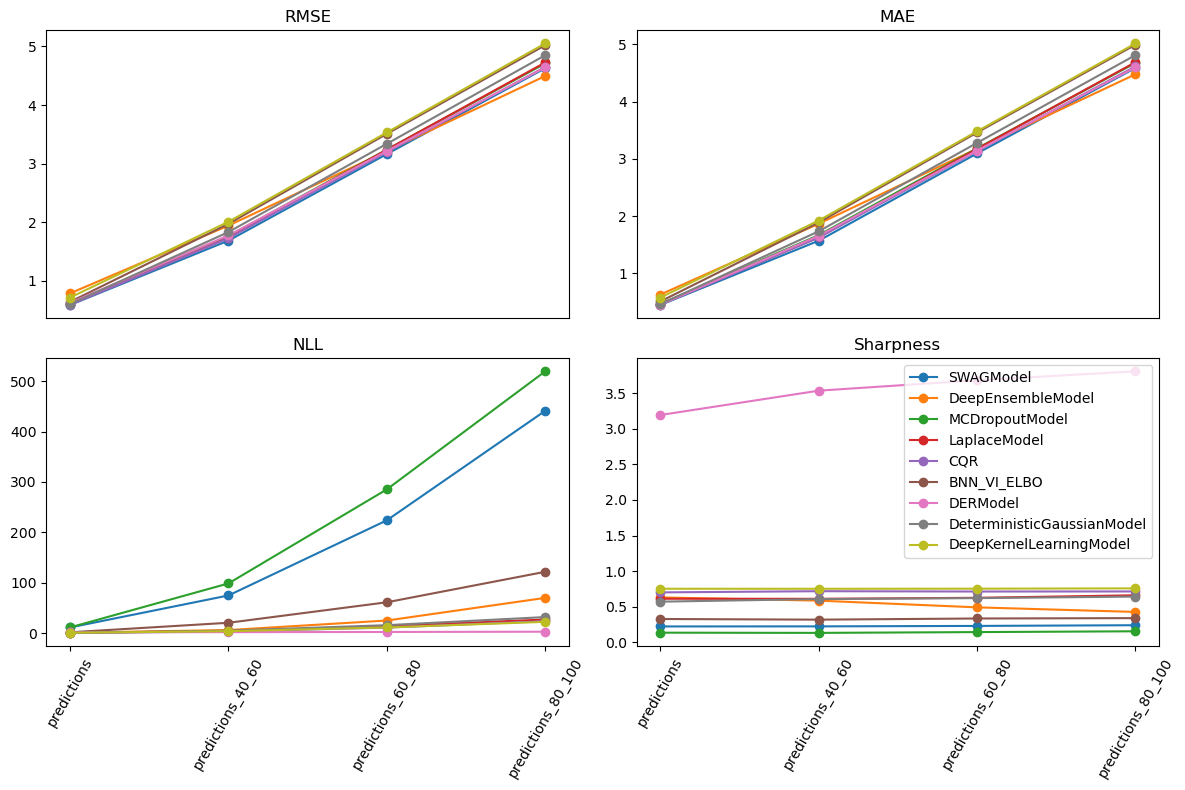

In [6]:
def create_ood_plot(full_df: pd.DataFrame, gap=False) -> plt.Figure:
    """Create plot for levels of OOD.

    Args:
        full_df: df that holds all metric information

    Returns:
        figure
    """
    models = full_df["uqmethod"].unique()

    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
    for model in models:
        model_df = full_df[full_df["uqmethod"] == model].copy()
        if not gap:
            model_df.sort_values(by="split", inplace=True)
        model_df.reset_index(drop=True, inplace=True)

        ax[0, 0].plot(model_df["split"].values, model_df["rmse"].values, marker="o", label=model)
        ax[0, 0].set_title("RMSE")
        ax[0, 0].set_xticks([])
        ax[0, 1].plot(model_df["split"].values, model_df["mae"].values, marker="o", label=model)
        ax[0, 1].set_title("MAE")
        ax[0, 1].set_xticks([])

        ax[1, 0].plot(model_df["split"].values, model_df["nll"].values, marker="o", label=model)
        ax[1, 0].set_title("NLL")
        ax[1, 0].tick_params("x", labelrotation=60)
        ax[1, 1].plot(model_df["split"].values, model_df["sharp"].values, marker="o", label=model)
        ax[1, 1].set_title("Sharpness")
        ax[1, 1].tick_params("x", labelrotation=60)

    plt.legend()
    plt.tight_layout()
    plt.close()
    display(fig)


uq_methods_to_show = [
    'DeterministicGaussianModel', 
    "DeepEnsembleModel",
    "DeepKernelLearningModel",
    "SWAGModel",
    "LaplaceModel",
    "CQR",
    # 'QuantileRegressionModel',
    'MCDropoutModel', 
    'BNN_VI_ELBO', 
    'DERModel', 
    # 'BaseModel'
]
create_ood_plot(uq_metric_df[uq_metric_df["uqmethod"].isin(uq_methods_to_show)])

## Calibration

In [7]:
from typing import Union, List, Any
from matplotlib.axes import Axes
from uncertainty_toolbox.metrics_calibration import (
    get_proportion_lists,
    get_proportion_lists_vectorized,
    adversarial_group_calibration,
    miscalibration_area,
    miscalibration_area_from_proportions,
)

def filter_subset(input_list: List[List[Any]], n_subset: int) -> List[List[Any]]:
    """Keep only n_subset random indices from all lists given in input_list.

    Args:
        input_list: list of lists.
        n_subset: Number of points to plot after filtering.

    Returns:
        List of all input lists with sizes reduced to n_subset.
    """
    assert type(n_subset) is int
    n_total = len(input_list[0])
    idx = np.random.choice(range(n_total), n_subset, replace=False)
    idx = np.sort(idx)
    output_list = []
    for inp in input_list:
        outp = inp[idx]
        output_list.append(outp)
    return output_list

def plot_calibration(
    y_pred: np.ndarray,
    y_std: np.ndarray,
    y_true: np.ndarray,
    split_name: str,
    n_subset: Union[int, None] = None,
    curve_label: Union[str, None] = None,
    vectorized: bool = True,
    exp_props: Union[np.ndarray, None] = None,
    obs_props: Union[np.ndarray, None] = None,
    ax: Union[Axes, None] = None,
    prop_type: str = "interval",
) -> Axes:
    """Plot the observed proportion vs prediction proportion of outputs falling into a
    range of intervals, and display miscalibration area.

    Args:
        y_pred: 1D array of the predicted means for the held out dataset.
        y_std: 1D array of the predicted standard deviations for the held out dataset.
        y_true: 1D array of the true labels in the held out dataset.
        n_subset: Number of points to plot after filtering.
        curve_label: legend label str for calibration curve.
        vectorized: plot using get_proportion_lists_vectorized.
        exp_props: plot using the given expected proportions.
        obs_props: plot using the given observed proportions.
        ax: matplotlib.axes.Axes object.
        prop_type: "interval" to measure observed proportions for centered prediction intervals,
                   and "quantile" for observed proportions below a predicted quantile.
                   Ignored if exp_props and obs_props are provided as inputs.

    Returns:
        matplotlib.axes.Axes object with plot added.
    """
    # Create ax if it doesn't exist
    if ax is None:
        fig, ax = plt.subplots(figsize=(5, 5))

    # Optionally select a subset
    if n_subset is not None:
        [y_pred, y_std, y_true] = filter_subset([y_pred, y_std, y_true], n_subset)

    if (exp_props is None) or (obs_props is None):
        # Compute exp_proportions and obs_proportions
        if vectorized:
            (
                exp_proportions,
                obs_proportions,
            ) = get_proportion_lists_vectorized(
                y_pred, y_std, y_true, prop_type=prop_type
            )
        else:
            (exp_proportions, obs_proportions) = get_proportion_lists(
                y_pred, y_std, y_true, prop_type=prop_type
            )
    else:
        # If expected and observed proportions are given
        exp_proportions = np.array(exp_props).flatten()
        obs_proportions = np.array(obs_props).flatten()
        if exp_proportions.shape != obs_proportions.shape:
            raise RuntimeError("exp_props and obs_props shape mismatch")

    # Set label
    if curve_label is None:
        curve_label = "Predictor"

    # Plot
    ax.plot([0, 1], [0, 1], "--", c="gray")
    ax.plot(exp_proportions, obs_proportions, label=curve_label)#, c="#1f77b4")
    # ax.fill_between(exp_proportions, exp_proportions, obs_proportions, alpha=0.1)

    # Format plot
    ax.set_xlabel("Predicted Proportion in Interval")
    ax.set_ylabel("Observed Proportion in Interval")
    ax.axis("square")

    buff = 0.01
    ax.set_xlim([0 - buff, 1 + buff])
    ax.set_ylim([0 - buff, 1 + buff])

    ax.set_title(f"Avg Calibration {split_name}")

    # Compute miscalibration area
    miscalibration_area = miscalibration_area_from_proportions(
        exp_proportions=exp_proportions, obs_proportions=obs_proportions
    )

    # Annotate plot with the miscalibration area
    # ax.text(
    #     x=0.95,
    #     y=0.05,
    #     s="Miscalibration area = %.2f" % miscalibration_area,
    #     verticalalignment="bottom",
    #     horizontalalignment="right",
    #     fontsize="small",
    # )

    return ax

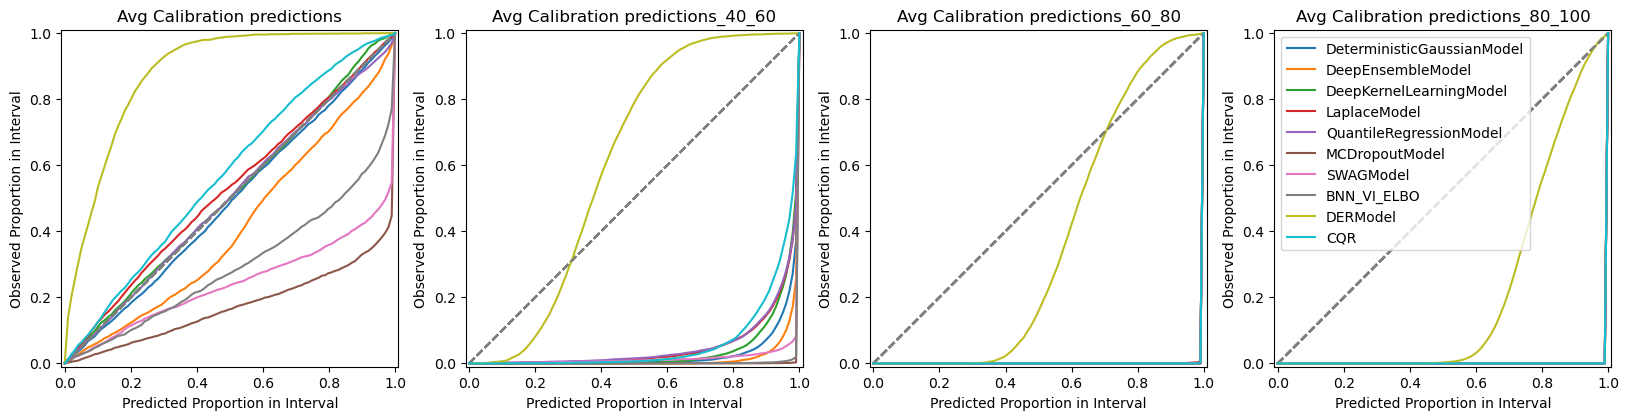

In [8]:
uq_methods_to_show = [
    'DeterministicGaussianModel', 
    "DeepEnsembleModel",
    "DeepKernelLearningModel",
    "LaplaceModel",
    'QuantileRegressionModel',
    'MCDropoutModel', 
    "SWAGModel",
    'BNN_VI_ELBO', 
    'DERModel', 
    "CQR",
    'BaseModel'
]

def generate_calibration_plot(uqmetric_df, gap=False):
    if gap:
        ncols=2
    else:
        ncols=4
    fig, axs = plt.subplots(ncols=ncols, figsize=(20, 12))
    for uq_method in uq_methods_to_show:
        plot_df = uqmetric_df[uqmetric_df["uqmethod"]==uq_method].copy()
        plot_df.sort_values(by="split", inplace=True)
        plot_df.reset_index(inplace=True)
        # for idx, pred_path in enumerate(plot_df["pred_path"].unique()):
        for idx, row in plot_df.iterrows():
            split_df = pd.read_csv(row["pred_path"])
            # print(split_df)
            if "pred_uct" in split_df.columns:
                plot_calibration(split_df["pred"].values.squeeze(), split_df["pred_uct"].values.squeeze(), split_df["targets"].values.squeeze(), ax=axs[idx], curve_label=uq_method, split_name=row["split"])

    plt.legend()
generate_calibration_plot(uq_metric_df)


## Scatter Plots

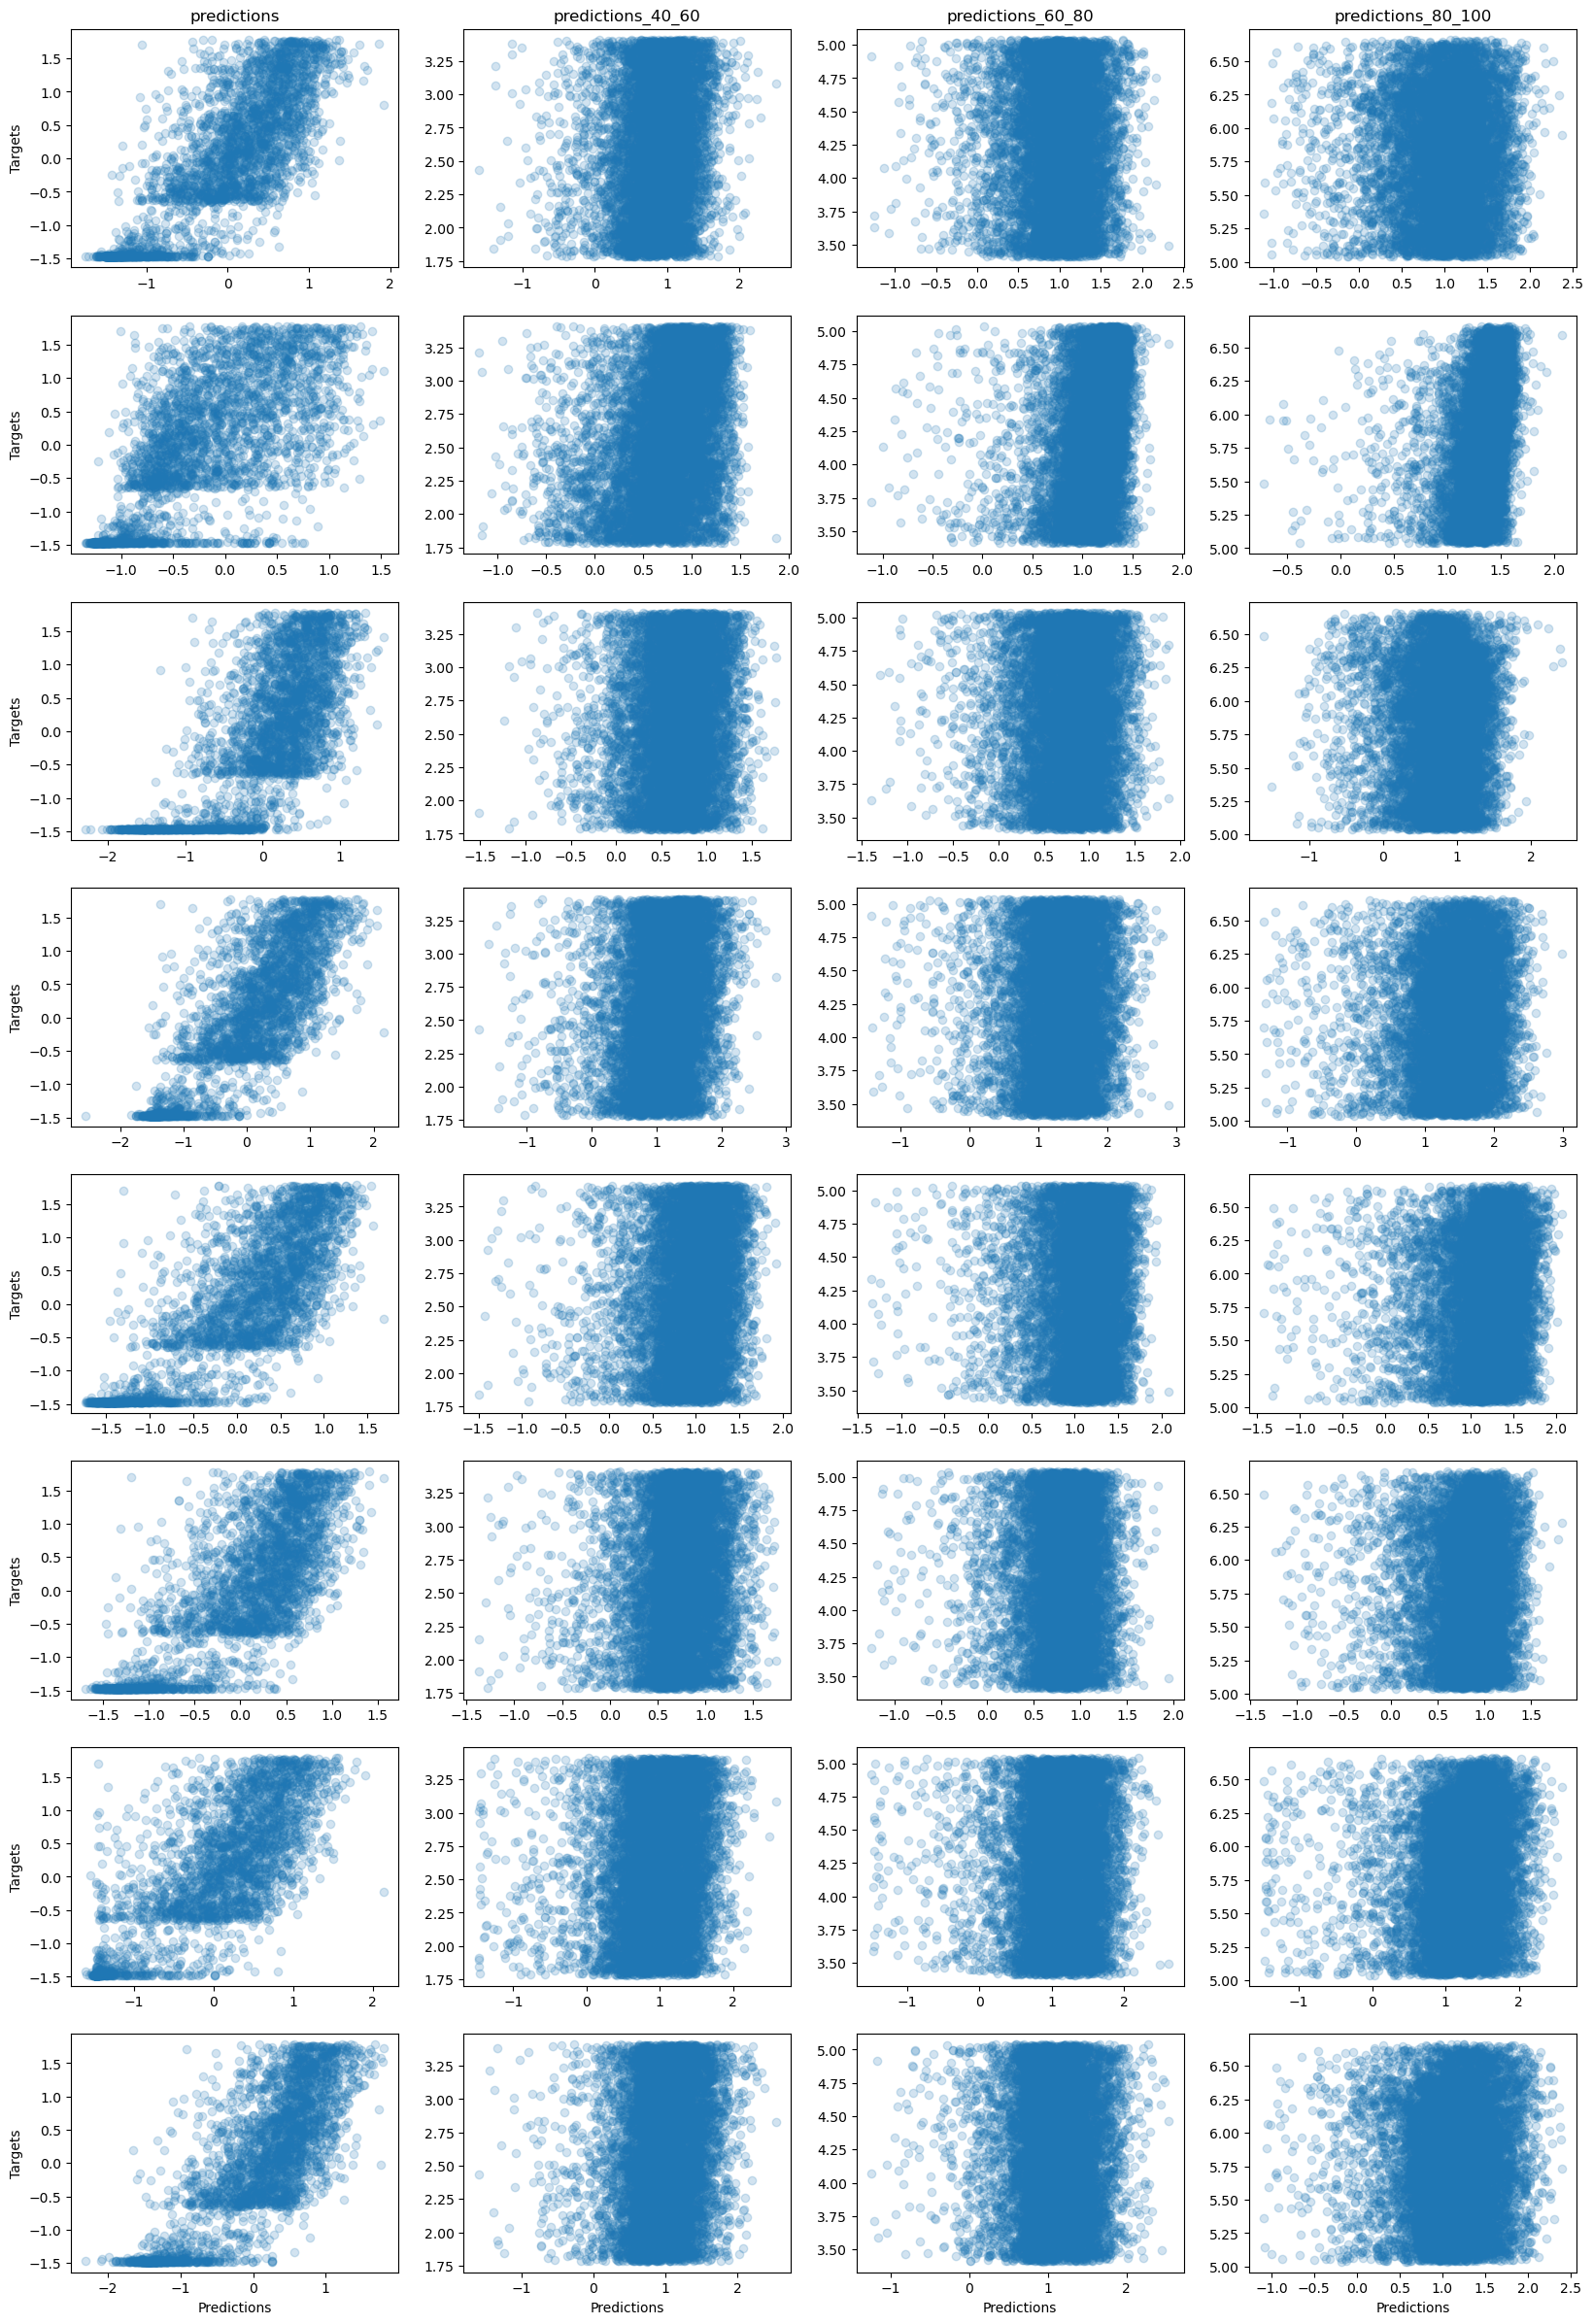

In [9]:
uq_methods_to_show = [
    'DeterministicGaussianModel', 
    "DeepEnsembleModel",
    "DeepKernelLearningModel",
    # "LaplaceModel",
    'QuantileRegressionModel',
    'MCDropoutModel', 
    # "SWAGModel",
    'BNN_VI_ELBO', 
    'DERModel', 
    # "CQR",
    'BaseModel'
]

fig, axs = plt.subplots(nrows=len(uq_methods_to_show), ncols=4, figsize=(20,30))
for row_idx, uq_method in enumerate(uq_methods_to_show):
    uq_df = overview_df[overview_df["uqmethod"]==uq_method].copy()
    uq_df.sort_values(by="pred_path", inplace=True)
    uq_df.reset_index(drop=True, inplace=True)
    for col_idx, row in uq_df.iterrows():
        pred_df = pd.read_csv(row["pred_path"])

        axs[row_idx, col_idx].scatter(pred_df["pred"].values, pred_df["targets"].values, alpha=0.2)

        if row_idx == len(uq_methods_to_show) - 1:
            axs[row_idx, col_idx].set_xlabel("Predictions")
        if row_idx == 0:
            split = row["pred_path"].split(os.sep)[-1].split(".")[0]
            axs[row_idx, col_idx].set_title(f"{split}")
        if col_idx == 0:
            axs[row_idx, col_idx].set_ylabel("Targets")

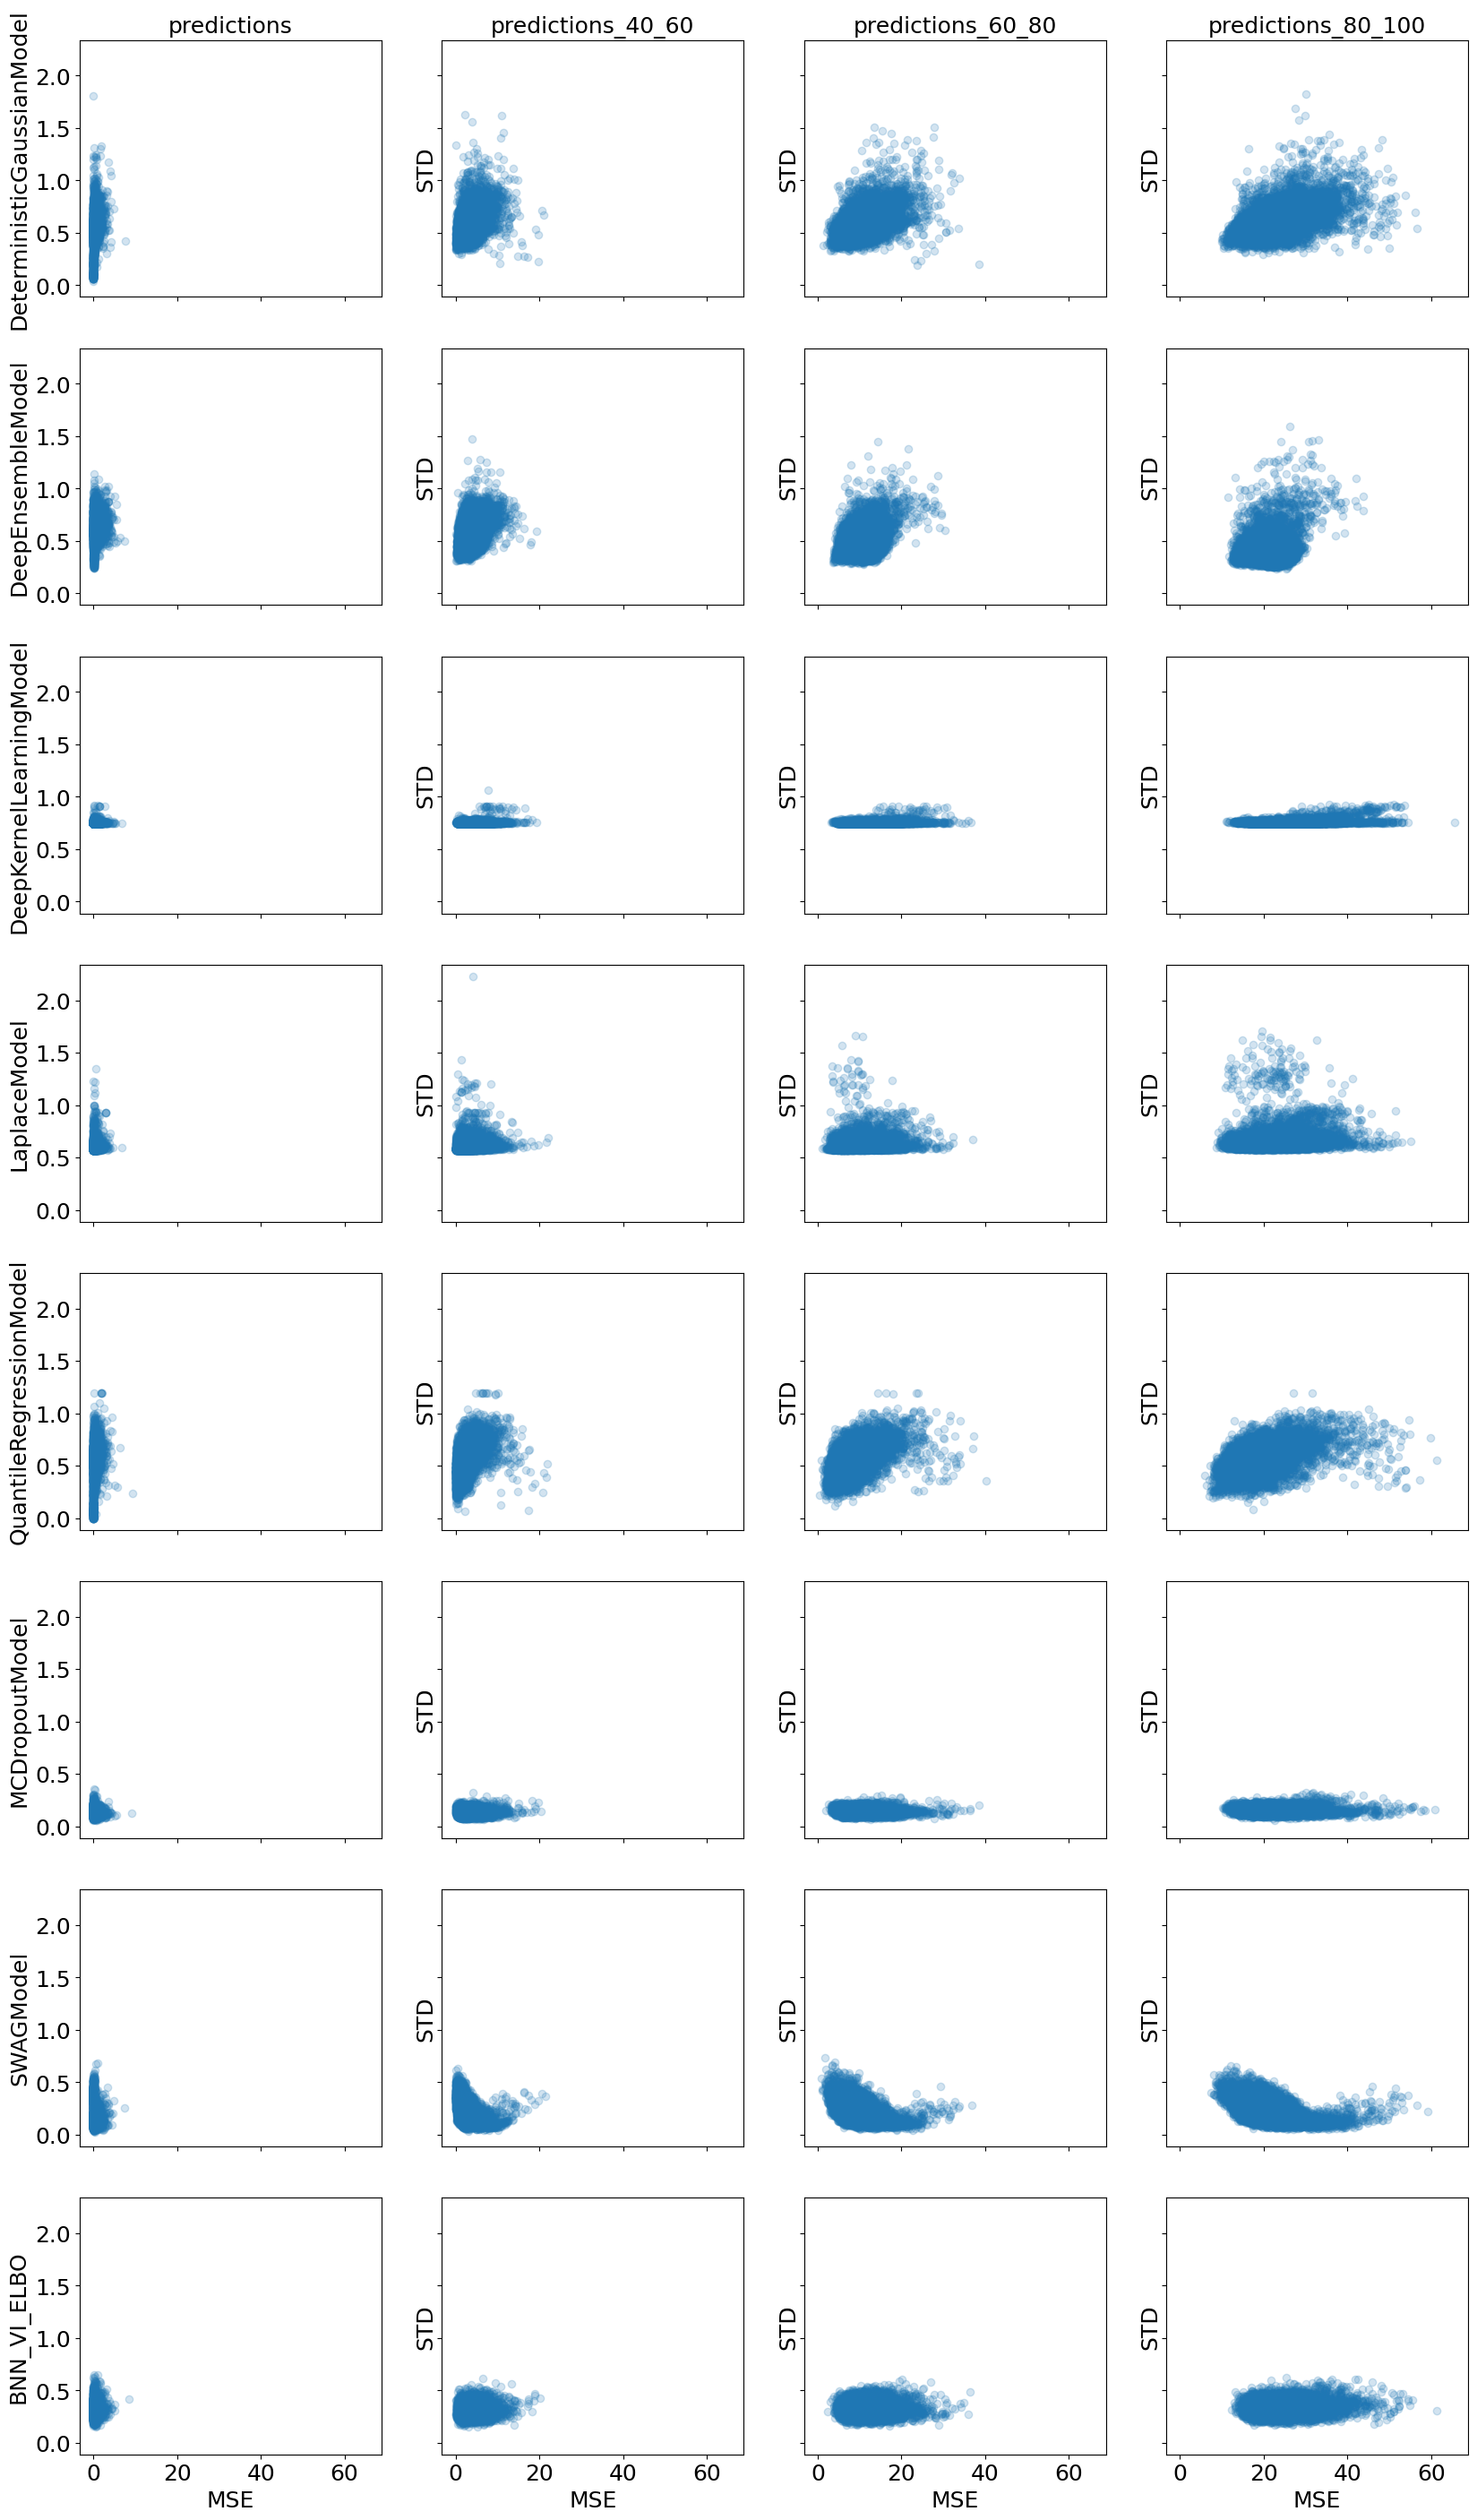

In [10]:
uq_methods_to_show = [
    'DeterministicGaussianModel', 
    "DeepEnsembleModel",
    "DeepKernelLearningModel",
    "LaplaceModel",
    'QuantileRegressionModel',
    'MCDropoutModel', 
    "SWAGModel",
    'BNN_VI_ELBO', 
    # 'DERModel', 
    # "CQR",
]

def generate_scatter_plots(overview_df, gap=False):
    if gap:
        ncols=2
    else:
        ncols=4

    fig, axs = plt.subplots(nrows=len(uq_methods_to_show), ncols=ncols, figsize=(20,35), sharex=True, sharey=True)
    for row_idx, uq_method in enumerate(uq_methods_to_show):
        uq_df = overview_df[overview_df["uqmethod"]==uq_method].copy()
        if not gap:
            uq_df.sort_values(by="pred_path", inplace=True)
        uq_df.reset_index(drop=True, inplace=True)
        for col_idx, row in uq_df.iterrows():
            pred_df = pd.read_csv(row["pred_path"])

            mse = (pred_df["pred"] - pred_df["targets"])**2


            axs[row_idx, col_idx].scatter(mse, pred_df["pred_uct"].values, alpha=0.2)

            axs[row_idx, col_idx].tick_params(axis='both', which='major', labelsize=18)

            if row_idx == len(uq_methods_to_show) - 1:
                axs[row_idx, col_idx].set_xlabel("MSE", fontsize=18)
            if row_idx == 0:
                split = row["pred_path"].split(os.sep)[-1].split(".")[0]
                axs[row_idx, col_idx].set_title(f"{split}", fontsize=18)
            if col_idx != 0:
                axs[row_idx, col_idx].set_ylabel("STD", fontsize=18)
            if col_idx == 0:
                axs[row_idx, col_idx].set_ylabel(uq_method, fontsize=18)

    # plt.setp(axs, xlim=(-1.5, 1.5), ylim=(-1.5, 1.5))

generate_scatter_plots(overview_df)


## Prediction Intervals

In [11]:
from typing import Tuple
def plot_intervals_ordered(
    y_pred: np.ndarray,
    y_std: np.ndarray,
    y_true: np.ndarray,
    n_subset: Union[int, None] = None,
    ylims: Union[Tuple[float, float], None] = None,
    num_stds_confidence_bound: int = 2,
    ax: Union[Axes, None] = None,
) -> Axes:
    """Plot predictions and predictive intervals versus true values, with points ordered
    by true value along x-axis.

    Args:
        y_pred: 1D array of the predicted means for the held out dataset.
        y_std: 1D array of the predicted standard deviations for the held out dataset.
        y_true: 1D array of the true labels in the held out dataset.
        n_subset: Number of points to plot after filtering.
        ylims: a tuple of y axis plotting bounds, given as (lower, upper).
        num_stds_confidence_bound: width of intervals, in terms of number of standard
            deviations.
        ax: matplotlib.axes.Axes object.

    Returns:
        matplotlib.axes.Axes object with plot added.
    """
    # Create ax if it doesn't exist
    if ax is None:
        fig, ax = plt.subplots(figsize=(5, 5))

    # Optionally select a subset
    if n_subset is not None:
        [y_pred, y_std, y_true] = filter_subset([y_pred, y_std, y_true], n_subset)

    order = np.argsort(y_true.flatten())
    y_pred, y_std, y_true = y_pred[order], y_std[order], y_true[order]
    xs = np.arange(len(order))
    intervals = num_stds_confidence_bound * y_std

    # Plot
    ax.errorbar(
        xs,
        y_pred,
        intervals,
        fmt="o",
        ls="none",
        linewidth=1.5,
        c="#1f77b4",
        alpha=0.5,
    )
    h1 = ax.plot(xs, y_pred, "o", c="#1f77b4")
    h2 = ax.plot(xs, y_true, "--", linewidth=2.0, c="#ff7f0e")

    # Legend
    ax.legend([h1[0], h2[0]], ["Predicted Values", "Observed Values"], loc=4)

    # Determine lims
    if ylims is None:
        intervals_lower_upper = [y_pred - intervals, y_pred + intervals]
        lims_ext = [
            int(np.floor(np.min(intervals_lower_upper[0]))),
            int(np.ceil(np.max(intervals_lower_upper[1]))),
        ]
    else:
        lims_ext = ylims

    # Format plot
    # ax.set_ylim(lims_ext)
    # 
    ax.set_ylabel("Predicted Values and Intervals")
    ax.set_aspect(1.0 / ax.get_data_ratio(), adjustable="box")

    return ax

No handles with labels found to put in legend.


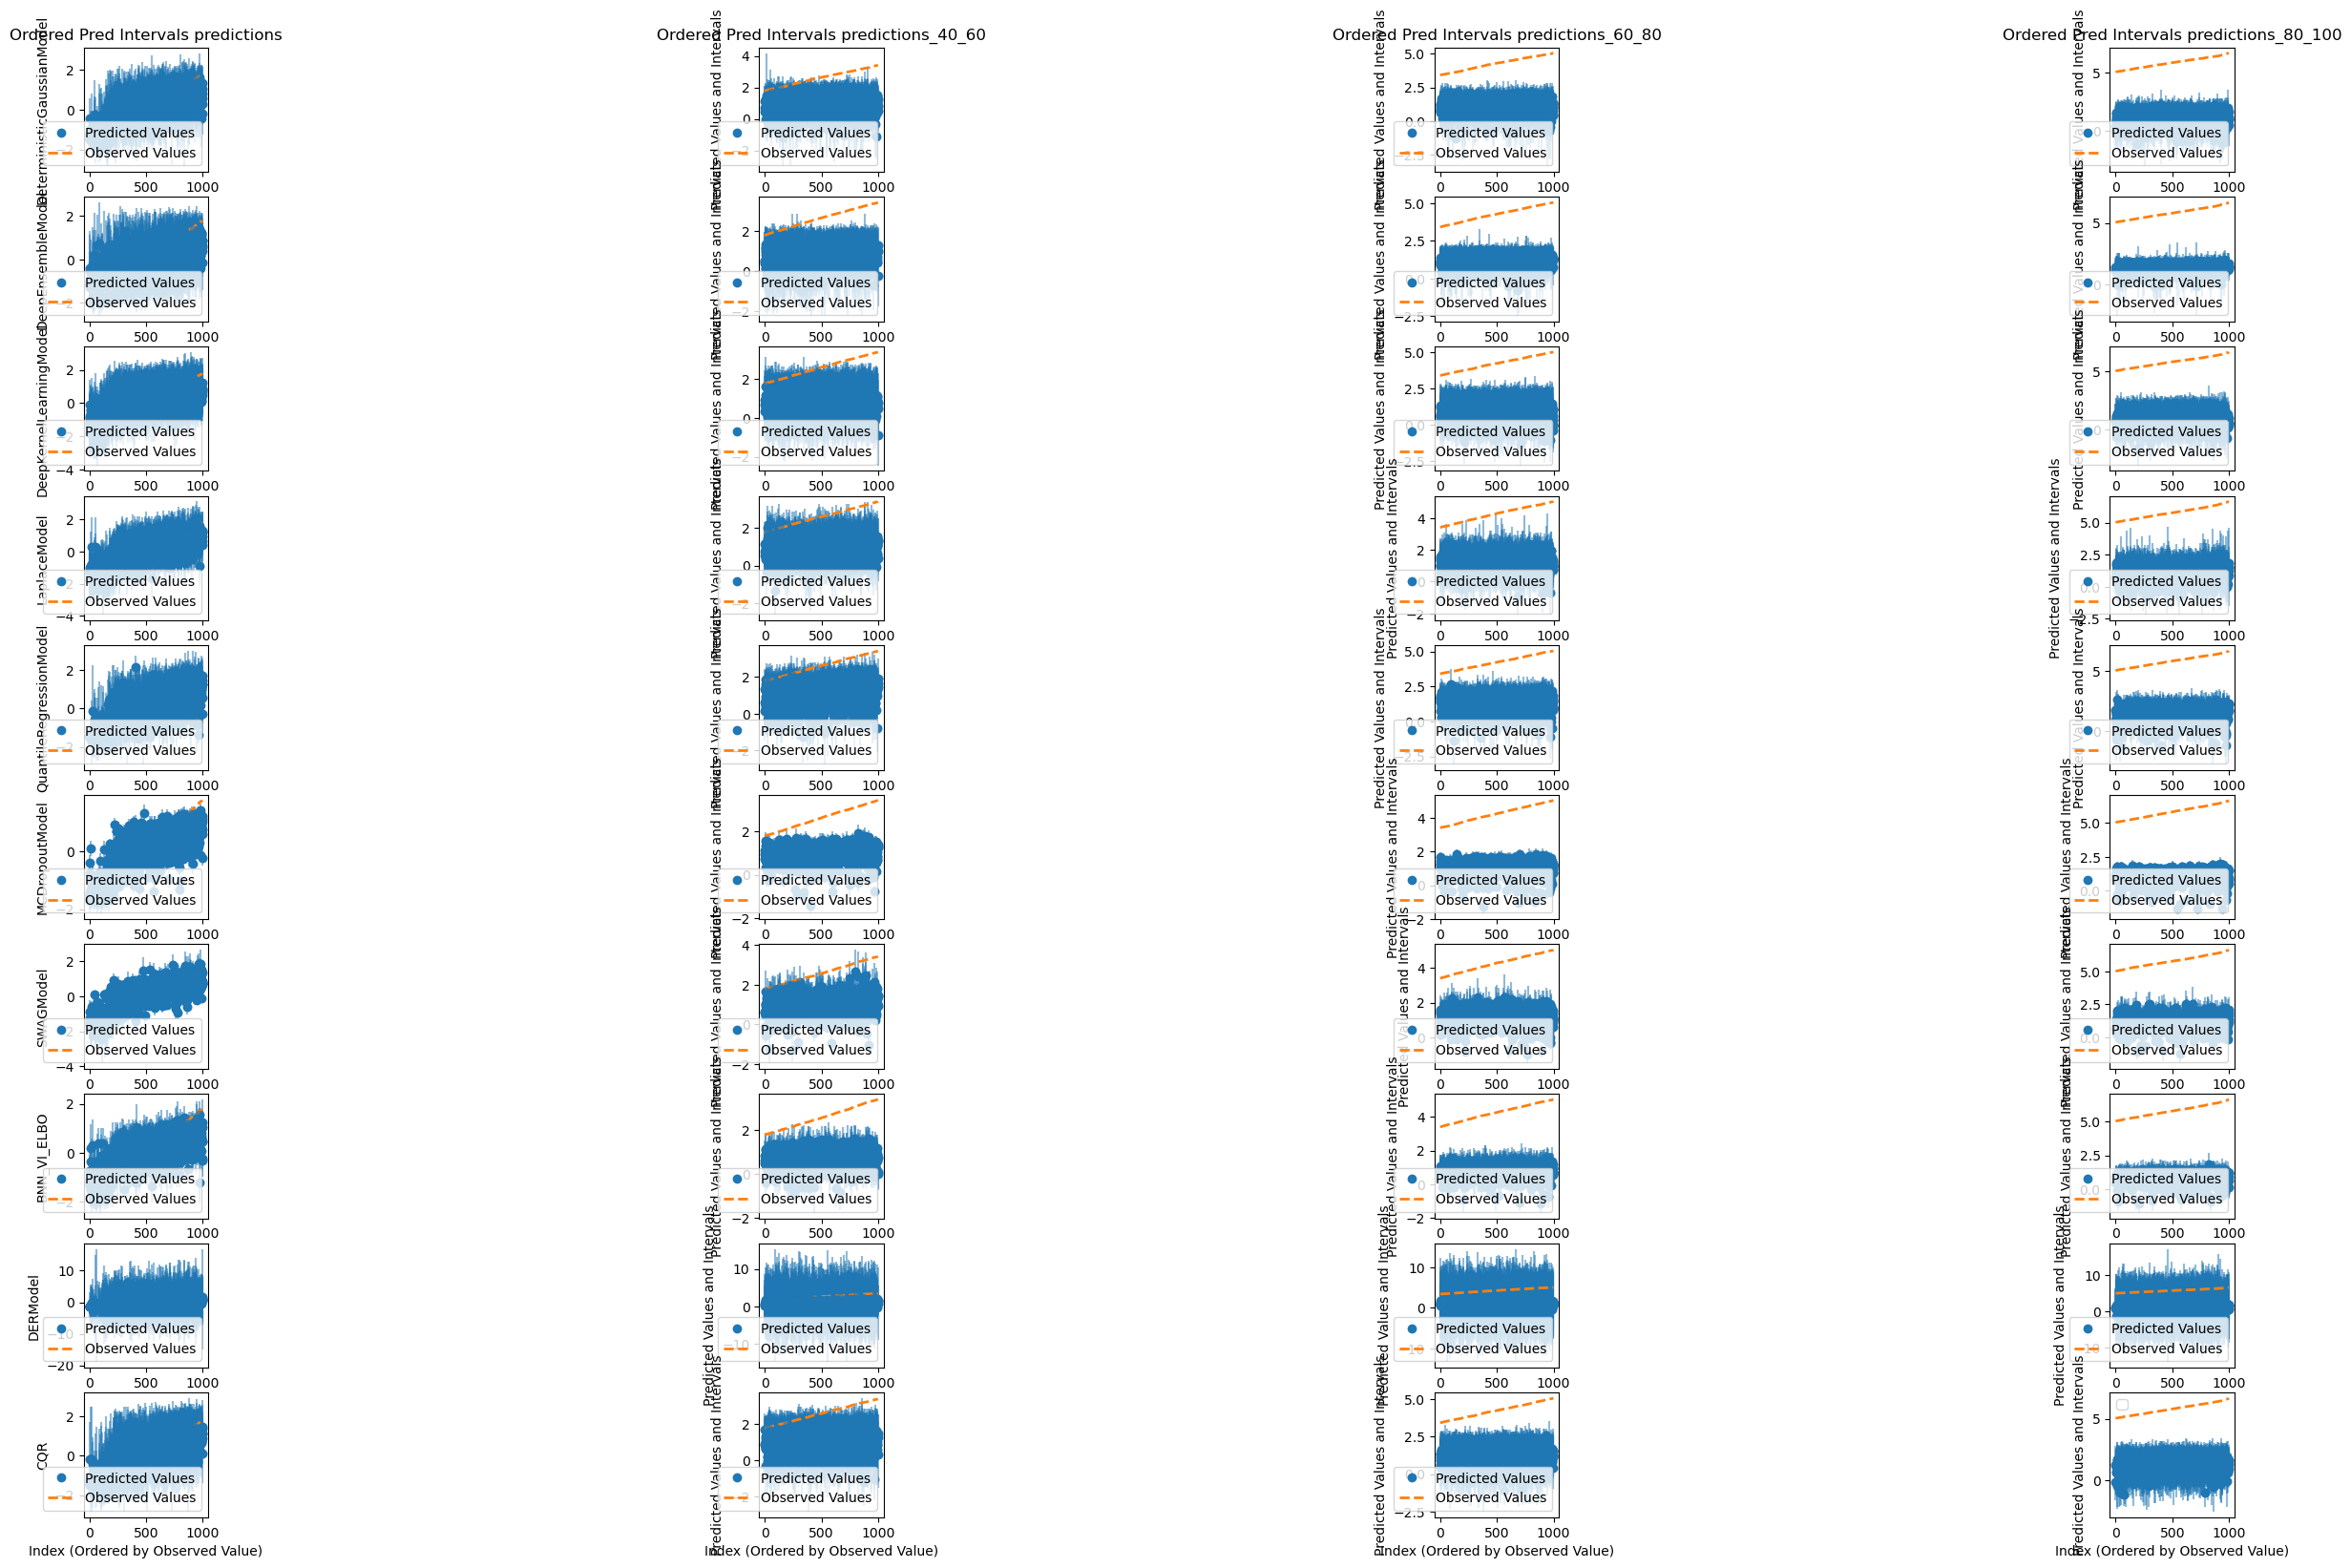

In [12]:
uq_methods_to_show = [
    'DeterministicGaussianModel', 
    "DeepEnsembleModel",
    "DeepKernelLearningModel",
    "LaplaceModel",
    'QuantileRegressionModel',
    'MCDropoutModel', 
    "SWAGModel",
    'BNN_VI_ELBO', 
    'DERModel', 
    "CQR",
    # 'BaseModel'
]

fig, axs = plt.subplots(nrows=len(uq_methods_to_show), ncols=4, figsize=(35, 20))
for idx_uq, uq_method in enumerate(uq_methods_to_show):
    plot_df = uq_metric_df[uq_metric_df["uqmethod"]==uq_method].copy()
    plot_df.sort_values(by="split", inplace=True)
    plot_df.reset_index(inplace=True)
    # for idx, pred_path in enumerate(plot_df["pred_path"].unique()):
    for idx, row in plot_df.iterrows():
        split_df = pd.read_csv(row["pred_path"])
        # print(split_df)
        if "pred_uct" in split_df.columns:
            plot_intervals_ordered(split_df["pred"].values.squeeze(), split_df["pred_uct"].values.squeeze(), split_df["targets"].values.squeeze(), n_subset=1000, ax=axs[idx_uq, idx])
        if idx_uq == 0:
            axs[idx_uq,idx].set_title(f"Ordered Pred Intervals {row['split']}")

        if idx_uq == len(uq_methods_to_show) - 1:
            axs[idx_uq, idx].set_xlabel("Index (Ordered by Observed Value)")
    axs[idx_uq,0].set_ylabel(uq_method)


plt.legend()

# GAP

In [13]:
# split predictions in predictions_left.csv, predictions_right.csv
def split_predictions_into_left_right(overview_df):
    for row_idx, row in overview_df.iterrows():
        if row["pred_path"].endswith("predictions.csv"):
            pred_df = pd.read_csv(row["pred_path"])
            left = pred_df[pred_df["targets"]<0].copy()
            right = pred_df[pred_df["targets"]>=0].copy()
            left.to_csv(os.path.join(os.path.dirname(row["pred_path"]), "predictions_left.csv"), index=False)
            right.to_csv(os.path.join(os.path.dirname(row["pred_path"]), "predictions_right.csv"), index=False)

In [14]:
gap_path = "/p/project/hai_uqmethodbox/experiment_output/usa_vars_reproduce_ood_gap"

gap_paths = glob.glob(os.path.join(gap_path, "*", "predictions*.csv"))
overview_df_gap = compute_overview_df(gap_paths)

# split_predictions_into_left_right(overview_df_gap)

# gap_paths = glob.glob(os.path.join(gap_path, "*", "predictions_*.csv"))
# overview_df_gap = compute_overview_df(gap_paths)
# overview_df_gap["split"] = overview_df_gap["pred_path"].str.split(os.sep, expand=True)[7].str.split(".", expand=True)[0]
# overview_df_gap['split'] = pd.Categorical(overview_df_gap['split'], categories=sorting_order, ordered=True)
# overview_df_gap = overview_df_gap.sort_values('split')
overview_df_gap

# sorting_order = ['predictions_left', 'predictions_gap', 'predictions_right']

# # Convert 'split' column to categorical with the desired sorting order
# overview_df_gap['split'] = pd.Categorical(overview_df_gap['split'], categories=sorting_order, ordered=True)
# overview_df_gap

uqmethod  \
0                    SWAGModel   
1                    SWAGModel   
2                     DERModel   
3                     DERModel   
4      QuantileRegressionModel   
5      QuantileRegressionModel   
6                 LaplaceModel   
7                 LaplaceModel   
8            DeepEnsembleModel   
9            DeepEnsembleModel   
10     DeepKernelLearningModel   
11     DeepKernelLearningModel   
12  DeterministicGaussianModel   
13  DeterministicGaussianModel   
14                         CQR   
15                         CQR   
16                   BaseModel   
17                   BaseModel   
18              MCDropoutModel   
19              MCDropoutModel   
20                 BNN_VI_ELBO   
21                 BNN_VI_ELBO   

                                            pred_path  \
0   /p/project/hai_uqmethodbox/experiment_output/u...   
1   /p/project/hai_uqmethodbox/experiment_output/u...   
2   /p/project/hai_uqmethodbox/experiment_output/u...   
3   /p/project/hai_uqmethodbox/experiment_output/u...   
4   /p/project/hai_uqmethodbox/experiment_output/u...   
5   /p/project/hai_uqmethodbox/experiment_output/u...   
6   /p/project/hai_uqmethodbox/experiment_output/u...   
7   /p/project/hai_uqmethodbox/experiment_output/u...   
8   /p/project/hai_uqmethodbox/experiment_output/u...   
9   /p/project/hai_uqmethodbox/experiment_output/u...   
10  /p/project/hai_uqmethodbox/experiment_output/u...   
11  /p/project/hai_uqmethodbox/experiment_output/u...   
12  /p/project/hai_uqmethodbox/experiment_output/u...   
13  /p/project/hai_uqmethodbox/experiment_output/u...   
14  /p/project/hai_uqmethodbox/experiment_output/u...   
15  /p/project/hai_uqmethodbox/experiment_output/u...   
16  /p/project/hai_uqmethodbox/experiment_output/u...   
17  /p/project/hai_uqmethodbox/experiment_output/u...   
18  /p/project/hai_uqmethodbox/experiment_output/u...   
19  /p/project/hai_uqmethodbox/experiment_output/u...   
20  /p/project/hai_uqmethodbox/experiment_output/u...   
21  /p/project/hai_uqmethodbox/experiment_output/u...   

                                            conf_path  \
0   /p/project/hai_uqmethodbox/experiment_output/u...   
1   /p/project/hai_uqmethodbox/experiment_output/u...   
2   /p/project/hai_uqmethodbox/experiment_output/u...   
3   /p/project/hai_uqmethodbox/experiment_output/u...   
4   /p/project/hai_uqmethodbox/experiment_output/u...   
5   /p/project/hai_uqmethodbox/experiment_output/u...   
6   /p/project/hai_uqmethodbox/experiment_output/u...   
7   /p/project/hai_uqmethodbox/experiment_output/u...   
8   /p/project/hai_uqmethodbox/experiment_output/u...   
9   /p/project/hai_uqmethodbox/experiment_output/u...   
10  /p/project/hai_uqmethodbox/experiment_output/u...   
11  /p/project/hai_uqmethodbox/experiment_output/u...   
12  /p/project/hai_uqmethodbox/experiment_output/u...   
13  /p/project/hai_uqmethodbox/experiment_output/u...   
14  /p/project/hai_uqmethodbox/experiment_output/u...   
15  /p/project/hai_uqmethodbox/experiment_output/u...   
16  /p/project/hai_uqmethodbox/experiment_output/u...   
17  /p/project/hai_uqmethodbox/experiment_output/u...   
18  /p/project/hai_uqmethodbox/experiment_output/u...   
19  /p/project/hai_uqmethodbox/experiment_output/u...   
20  /p/project/hai_uqmethodbox/experiment_output/u...   
21  /p/project/hai_uqmethodbox/experiment_output/u...   

                                          metric_path  
0   /p/project/hai_uqmethodbox/experiment_output/u...  
1   /p/project/hai_uqmethodbox/experiment_output/u...  
2   /p/project/hai_uqmethodbox/experiment_output/u...  
3   /p/project/hai_uqmethodbox/experiment_output/u...  
4   /p/project/hai_uqmethodbox/experiment_output/u...  
5   /p/project/hai_uqmethodbox/experiment_output/u...  
6   /p/project/hai_uqmethodbox/experiment_output/u...  
7   /p/project/hai_uqmethodbox/experiment_output/u...  
8   /p/project/hai_uqmethodbox/experiment_output/u...  
9   /p/project/hai_uqmethodbox/experiment_output/u...  

In [15]:
uq_metric_df_gap, selective_df_gap = compute_uncertainty_df(overview_df_gap)
uq_metric_df_gap

 (1/n) Calculating accuracy metrics
 (1/n) Calculating accuracy metrics
 (1/n) Calculating accuracy metrics
 (1/n) Calculating accuracy metrics


nll      crps     check  interval   rms_cal    ma_cal  miscal_area  \
0   12.661495  0.188574  0.094936  1.302391  0.090659  0.066874     0.067539   
1   13.749275  0.318636  0.160373  2.360328  0.448054  0.392238     0.396200   
2    1.233893  0.415870  0.209951  2.695311  0.429625  0.378811     0.382637   
3    1.798305  0.668889  0.337692  4.250946  0.342437  0.307735     0.310844   
4    0.154325  0.164622  0.083096  0.869235  0.041569  0.036586     0.036945   
5    1.479735  0.313460  0.158192  1.708738  0.138476  0.124845     0.126106   
6    0.344035  0.182068  0.091906  0.985599  0.104250  0.091885     0.092794   
7    0.662089  0.252395  0.127439  1.254609  0.087735  0.079839     0.080646   
8    0.413224  0.190812  0.096341  1.052590  0.241409  0.215065     0.217237   
9    0.746818  0.264637  0.133621  1.370321  0.113837  0.101679     0.102707   
10   0.795714  0.294556  0.148730  1.499848  0.073804  0.065044     0.065701   
11   0.710315  0.269187  0.135922  1.353908  0.085662  0.077455     0.078237   
12   0.124586  0.168339  0.084978  0.866016  0.011201  0.008696     0.008766   
13   1.075414  0.273660  0.138133  1.455674  0.083213  0.073005     0.073742   
14   0.150699  0.168505  0.085068  0.876805  0.099330  0.088457     0.089333   
15   0.986694  0.282077  0.142398  1.475592  0.055963  0.049281     0.049779   
16        NaN       NaN       NaN       NaN       NaN       NaN          NaN   
17        NaN       NaN       NaN       NaN       NaN       NaN          NaN   
18   3.099222  0.214050  0.107809  1.464241  0.238656  0.211618     0.213756   
19   5.549779  0.290838  0.146385  2.142746  0.369826  0.325024     0.328307   
20   0.709016  0.215254  0.108609  1.219561  0.041467  0.028806     0.029085   
21   1.289116  0.276035  0.139293  1.552875  0.198946  0.177732     0.179527   

       sharp       mae      rmse      mdae       marpd        r2      corr  \
0   0.218184  0.231528  0.341067  0.158360   31.941137  0.884044  0.940402   
1   0.135790  0.377940  0.467277  0.328708  115.308581 -1.935022  0.534599   
2   2.097232  0.236451  0.382775  0.142323   32.989312  0.853950  0.925281   
3   2.918634  0.416525  0.505231  0.373546  120.537390 -2.431169  0.484681   
4   0.325375  0.225076  0.350833  0.143244   30.906443  0.877308  0.937035   
5   0.416069  0.425300  0.508851  0.386705  120.381426 -2.480513  0.515570   
6   0.356862  0.239189  0.350785  0.164240   33.492942  0.877342  0.937093   
7   0.354373  0.355311  0.440277  0.309494  113.869016 -1.605641  0.532331   
8   0.556155  0.232248  0.351211  0.154179   33.102683  0.877044  0.937342   
9   0.657549  0.356272  0.438838  0.311407  114.073179 -1.588631  0.526412   
10  0.593966  0.402221  0.531344  0.309031   59.545921  0.718573  0.849205   
11  0.589028  0.371700  0.474351  0.305383  121.349949 -2.024553  0.395523   
12  0.333537  0.236159  0.355968  0.159946   32.995529  0.873691  0.935808   
13  0.434627  0.371996  0.453396  0.332240  115.428082 -1.763240  0.524764   
14  0.374205  0.231476  0.350721  0.151147   32.557724  0.877387  0.936826   
15  0.467647  0.386230  0.469325  0.344229  117.338018 -1.960801  0.520757   
16       NaN  0.239189  0.350785  0.164240   33.492942  0.877342  0.937093   
17       NaN  0.355311  0.440277  0.309494  113.869016 -1.605641  0.532331   
18  0.140432  0.265132  0.376708  0.186285   37.849473  0.858544  0.927407   
19  0.128645  0.346963  0.432643  0.298946  114.822030 -1.516066  0.512405   
20  0.296093  0.285447  0.409237  0.193649   41.041790  0.833059  0.913210   
21  0.273007  0.367738  0.455280  0.320210  116.931741 -1.786244  0.492999   

              split                                          pred_path  \
0       predictions  /p/project/hai_uqmethodbox/experiment_output/u...   
1   predictions_gap  /p/project/hai_uqmethodbox/experiment_output/u...   
2       predictions  /p/project/hai_uqmethodbox/experiment_output/u...   
3   predictions_gap  /p/project/hai_uqmethodbox/experiment_output/u...   
4   

In [16]:
# sorting_order = ['predictions_left', 'predictions_gap', 'predictions_right']

# Convert 'split' column to categorical with the desired sorting order
# uq_metric_df_gap['split'] = pd.Categorical(uq_metric_df_gap['split'], categories=sorting_order, ordered=True)
# uq_metric_df_gap = uq_metric_df_gap.sort_values('split')
# uq_metric_df_gap

## OOD Plot

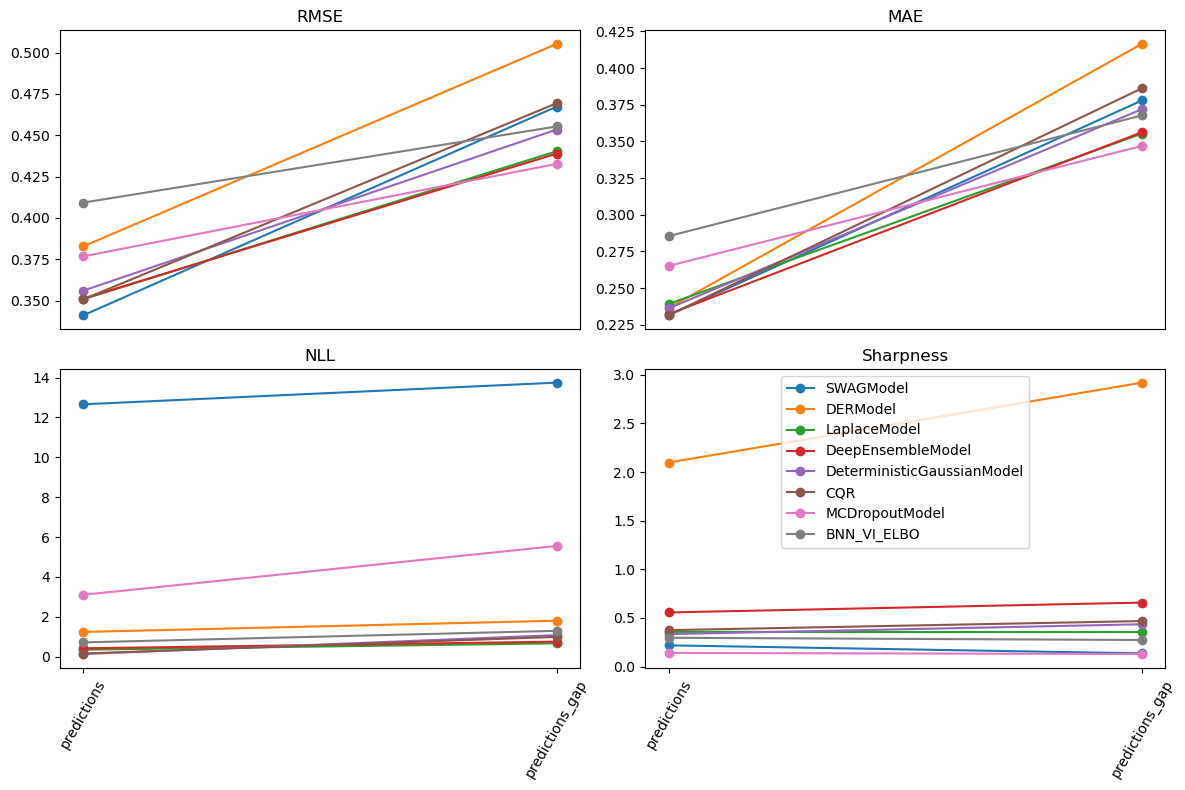

In [17]:
uq_methods_to_show = [
    'DeterministicGaussianModel', 
    "DeepEnsembleModel",
    # "DeepKernelLearningModel",
    "SWAGModel",
    "LaplaceModel",
    "CQR",
    # 'QuantileRegressionModel',
    'MCDropoutModel', 
    'BNN_VI_ELBO', 
    'DERModel', 
    # 'BaseModel'
]
create_ood_plot(uq_metric_df_gap[uq_metric_df_gap["uqmethod"].isin(uq_methods_to_show)], gap=True)

## Calibration

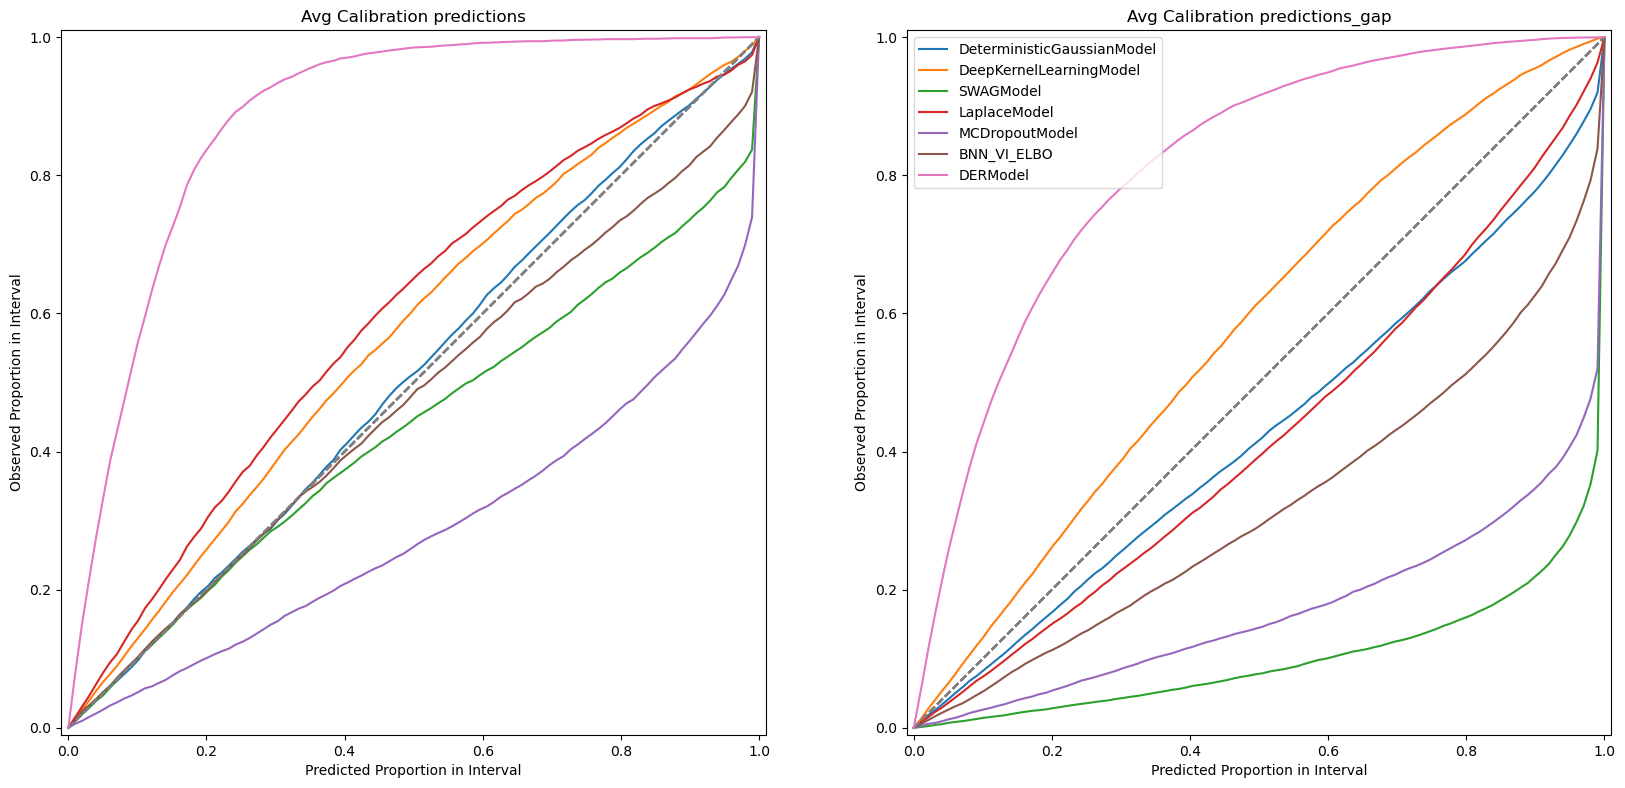

In [18]:
uq_methods_to_show = [
    'DeterministicGaussianModel', 
    # "DeepEnsembleModel",
    "DeepKernelLearningModel",
    "SWAGModel",
    "LaplaceModel",
    # "CQR",
    # 'QuantileRegressionModel',
    'MCDropoutModel', 
    'BNN_VI_ELBO', 
    'DERModel', 
    # 'BaseModel'
]
generate_calibration_plot(uq_metric_df_gap, gap=True)

## Scatter Plots

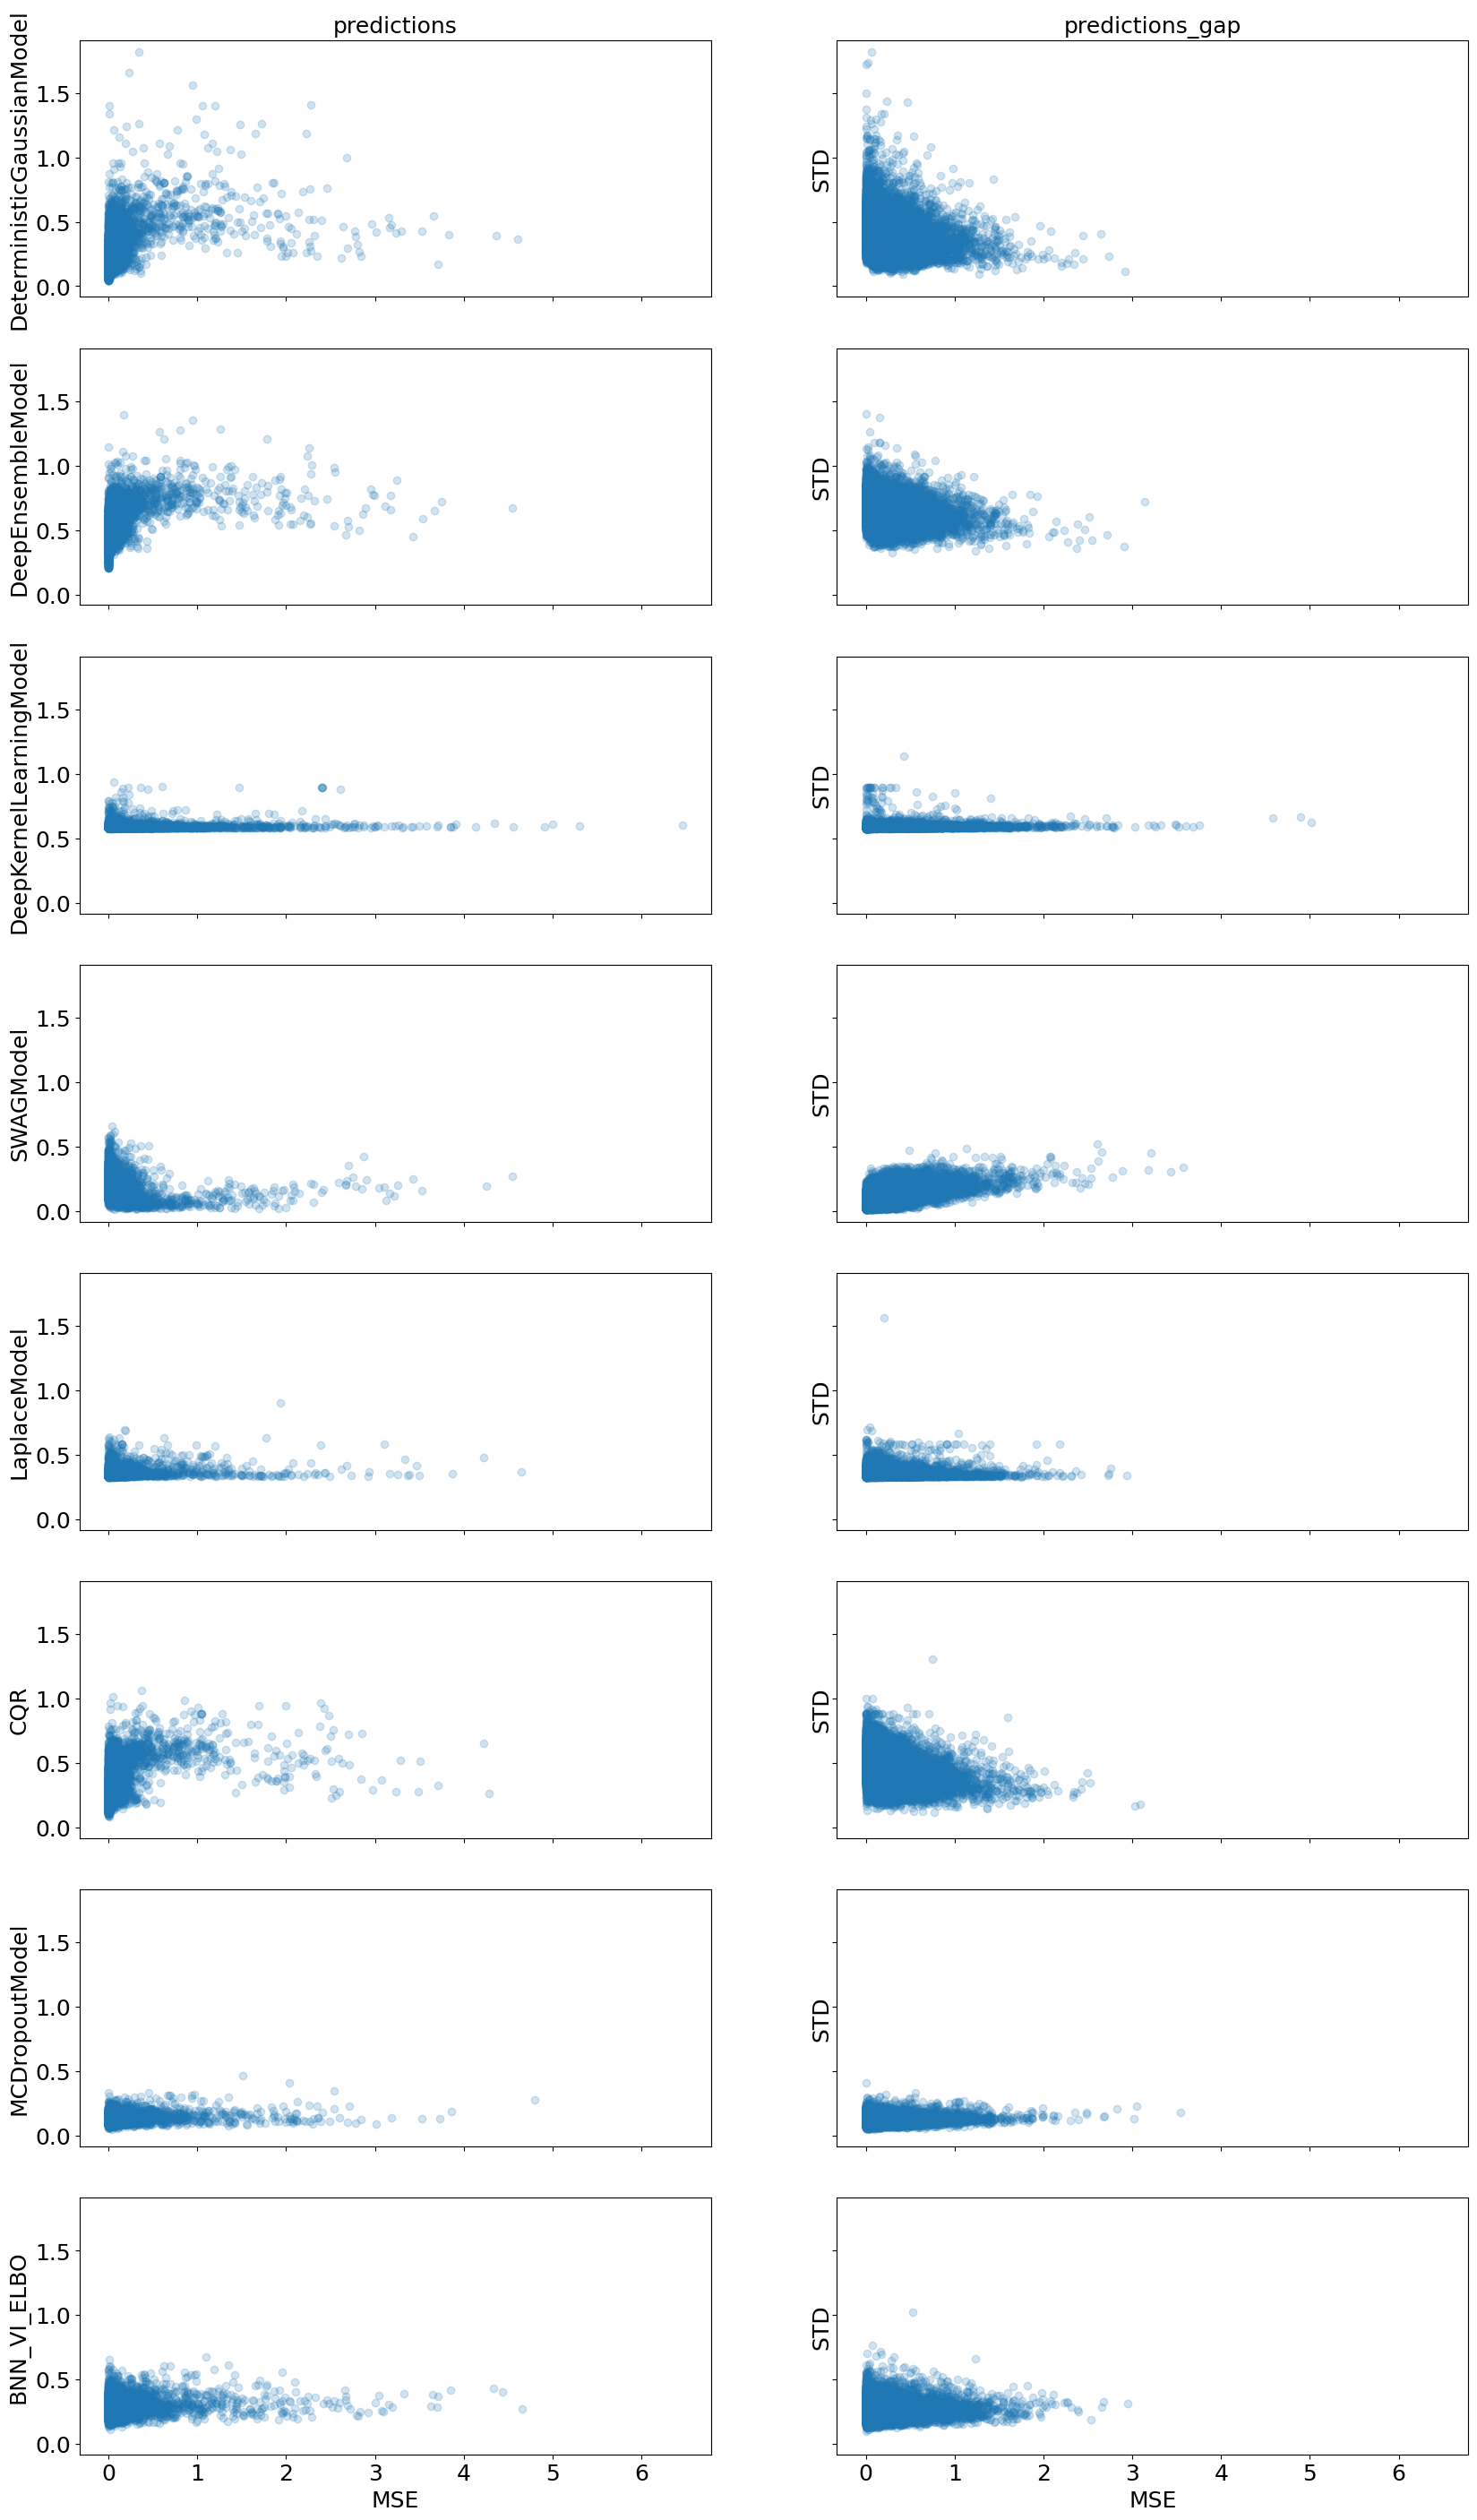

In [19]:
uq_methods_to_show = [
    'DeterministicGaussianModel', 
    "DeepEnsembleModel",
    "DeepKernelLearningModel",
    "SWAGModel",
    "LaplaceModel",
    "CQR",
    # 'QuantileRegressionModel',
    'MCDropoutModel', 
    'BNN_VI_ELBO', 
    # 'DERModel', 
    # 'BaseModel'
]
generate_scatter_plots(overview_df_gap, gap=True)

# 

# Maps

In [20]:
def points_to_bin(x, y, vals, scale=10.0):
    """bins points over 2d space with bin sizes specified by scale
     args:
     x,y: nx1 arrays of locations in 1 dimension each
     preds: nx1 array of values to be averaged
     scale: the edge of a bin/box in {x,y} units.
    returns:
     x0, y0: kx1, mx1 arrays of the x and y gridpoints
     vals_grid: (m-1)x(k-1) resulting aggregated values
    """
    x_range = np.max(x) - np.min(x)
    y_range = np.max(y) - np.min(y)
    bin_shapes = [int(y_range / scale), int(x_range / scale)]

    sums_grid, y0, x0 = np.histogram2d(y, x, bins=bin_shapes, weights=vals)
    counts, _, _ = np.histogram2d(y, x, bins=bin_shapes)
    vals_grid = sums_grid / counts
    vals_grid = np.ma.masked_invalid(vals_grid)

    return x0, y0, vals_grid

def aggregrate_and_bin_data(data_this, agg_scale=0.2):
    """Aggregated labels from the saved output of the primary analysis notebooks.
    Aggregate to 'agg_scale' for vizualization"""
    truth = data_this["targets"]
    preds = data_this["pred"]
    mse = (data_this["pred"] - data_this["targets"])**2
    # print(mse)
    std = data_this["pred_uct"]
    
    # aggregate the data into averaged bins
    lat_points, lon_points, truth_binned = points_to_bin(
        data_this["centroid_lon"], data_this["centroid_lat"], truth, scale=agg_scale
    )
    _, _, mse_binned = points_to_bin(
        data_this["centroid_lon"], data_this["centroid_lat"], mse, scale=agg_scale
    )

    _, _, std_binned = points_to_bin(
        data_this["centroid_lon"], data_this["centroid_lat"], preds, scale=agg_scale
    )

    return lat_points, lon_points, truth_binned, mse_binned, std_binned

# Plot everything in one

/tmp/ipykernel_11448/1138180451.py:17: RuntimeWarning: invalid value encountered in divide
  vals_grid = sums_grid / counts
/tmp/ipykernel_11448/1138180451.py:17: RuntimeWarning: invalid value encountered in divide
  vals_grid = sums_grid / counts
/tmp/ipykernel_11448/1138180451.py:17: RuntimeWarning: invalid value encountered in divide
  vals_grid = sums_grid / counts
/tmp/ipykernel_11448/1138180451.py:17: RuntimeWarning: invalid value encountered in divide
  vals_grid = sums_grid / counts
/tmp/ipykernel_11448/1138180451.py:17: RuntimeWarning: invalid value encountered in divide
  vals_grid = sums_grid / counts
/tmp/ipykernel_11448/1138180451.py:17: RuntimeWarning: invalid value encountered in divide
  vals_grid = sums_grid / counts
/tmp/ipykernel_11448/1138180451.py:17: RuntimeWarning: invalid value encountered in divide
  vals_grid = sums_grid / counts
/tmp/ipykernel_11448/1138180451.py:17: RuntimeWarning: invalid value encountered in divide
  vals_grid = sums_grid / counts


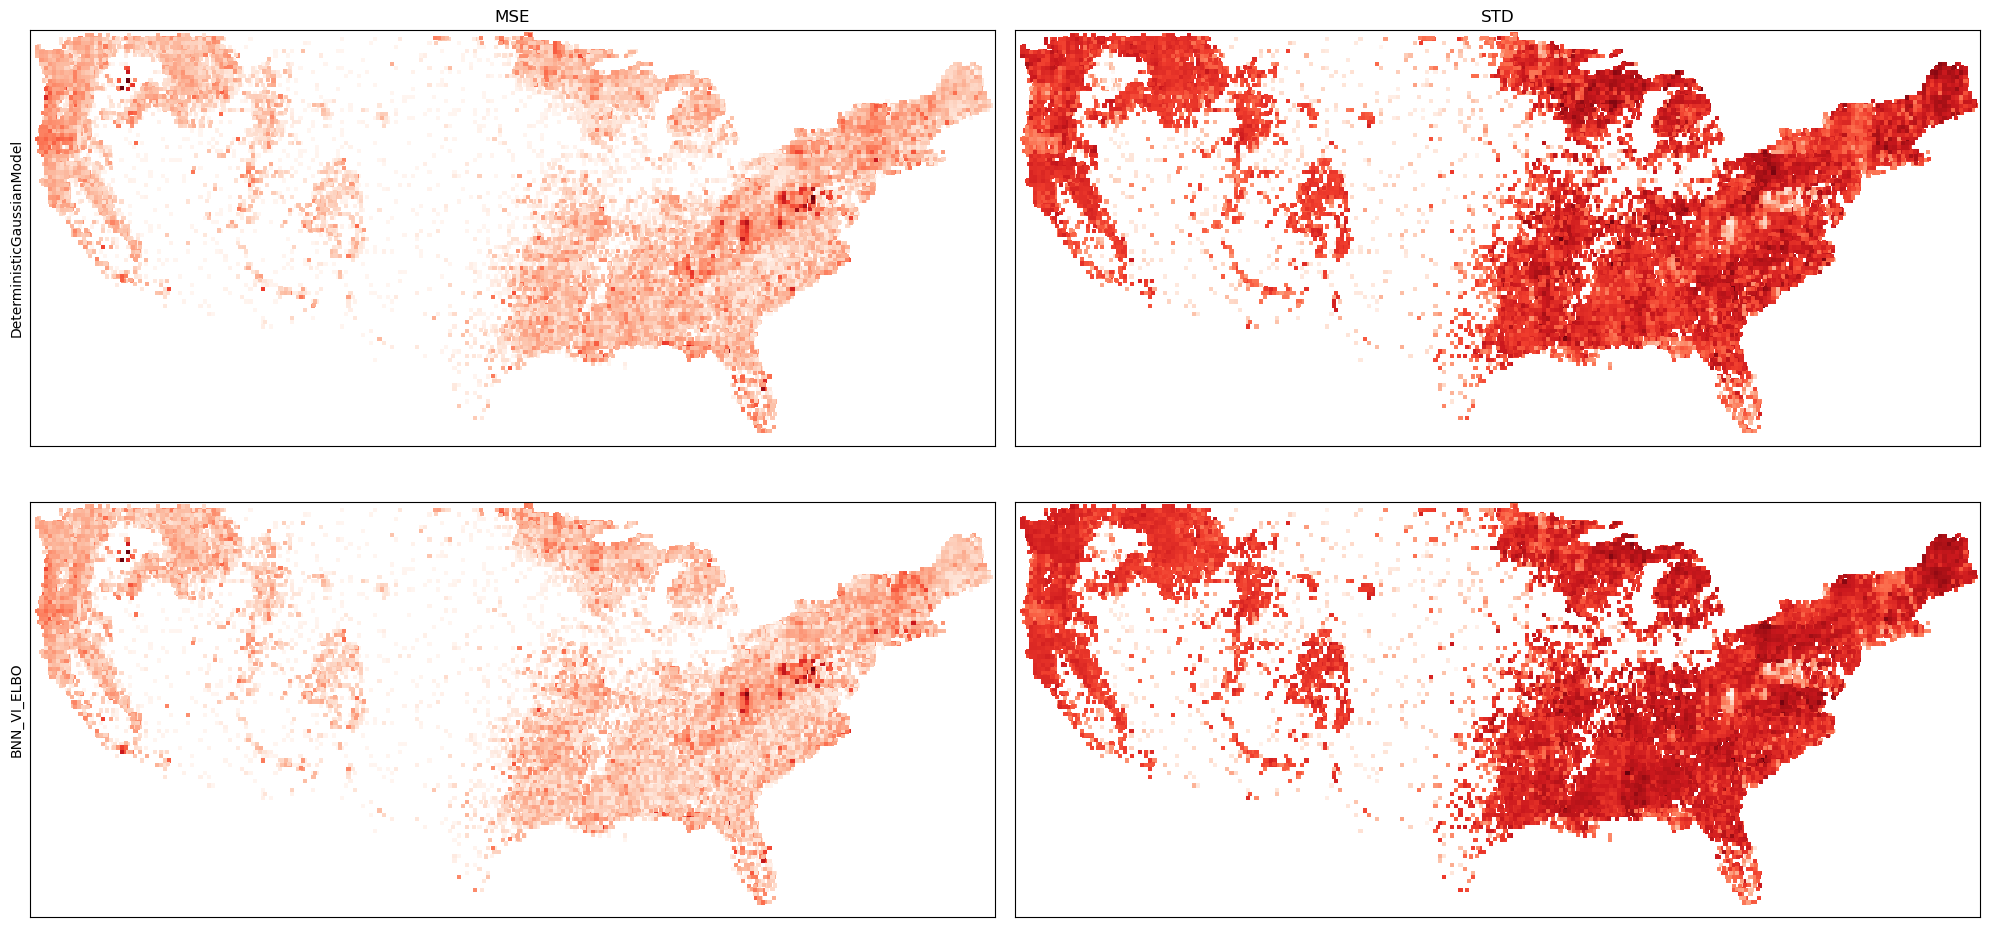

In [22]:
from mpl_toolkits.basemap import Basemap

uq_methods_to_show = [
    'DeterministicGaussianModel', 
    # 'QuantileRegressionModel',
    # 'MCDropoutModel', 
    'BNN_VI_ELBO', 
    # 'DERModel', 
    # 'BaseModel'
]

lat_min, lat_max = 24.396308, 49.384358
lon_min, lon_max = -125.000000, -66.934570
fig, axs = plt.subplots(nrows=len(uq_methods_to_show), ncols=2, figsize=(20, 10))

cmaps = ["Blues", "Greens", "Oranges", "Reds"]

for row_idx, uq_method in enumerate(uq_methods_to_show):
    plot_df = uq_metric_df[uq_metric_df["uqmethod"]==uq_method].copy()
    plot_df.sort_values(by="pred_path", inplace=True)
    plot_df.reset_index(inplace=True)

    # plot each of the splits
    err_map = Basemap(llcrnrlon=lon_min, llcrnrlat=lat_min, urcrnrlon=lon_max, urcrnrlat=lat_max, resolution='l', ax=axs[row_idx, 0])
    std_map = Basemap(llcrnrlon=lon_min, llcrnrlat=lat_min, urcrnrlon=lon_max, urcrnrlat=lat_max, resolution='l', ax=axs[row_idx, 1])
    for idx, row in plot_df.iterrows():
        split_df = pd.read_csv(row["pred_path"])
        lat_points, lon_points, truth_binned, mse_binned, std_binned = aggregrate_and_bin_data(split_df, agg_scale=0.25)

        # plot mse
        err_map.pcolormesh(lat_points, lon_points, mse_binned, latlon=True, cmap=cmaps[3])
        # fig.colorbar(err_map, ax=axs[row_idx, 0])

        # plot STD
        std_map.pcolormesh(lat_points, lon_points, std_binned, latlon=True, cmap=cmaps[3])
        # fig.colorbar(std_map, ax=axs[row_idx, 0])

        if row_idx == 0:
            axs[0, 0].set_title("MSE")
            axs[0, 1].set_title("STD")


    axs[row_idx, 0].set_ylabel(uq_method)

plt.tight_layout()
# fig, ax = plt.subplots(figsize=(10, 8))

# # basemap usa

# # make the plot
# m.pcolormesh(lat_points, lon_points, truth_binned, latlon=True, cmap='coolwarm')

# plt.colorbar(label='Predicted Values')


# Colorcode OOD splits

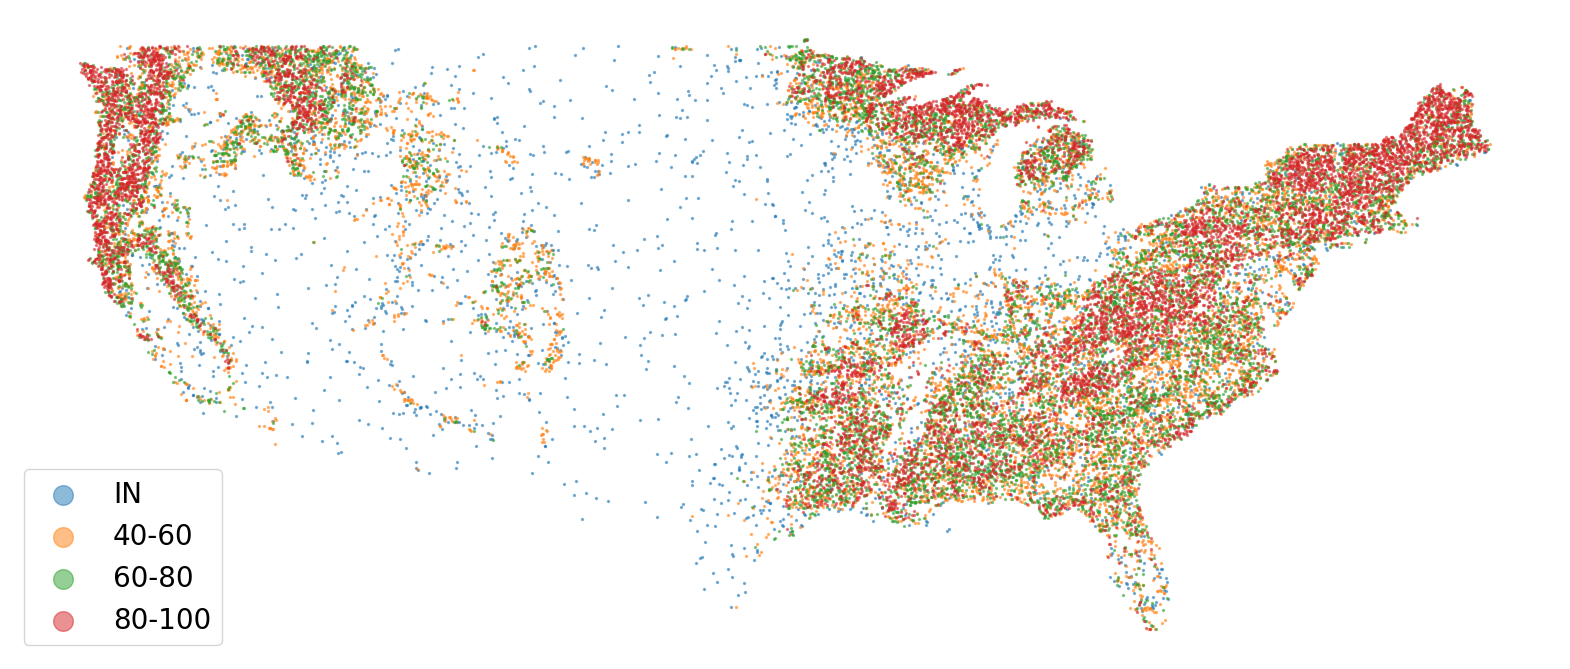

In [23]:
base_df = overview_df[overview_df["uqmethod"]=="BaseModel"].copy()
base_df.sort_values(by="pred_path", inplace=True)
import geopandas
import geoplot as gplt

fig, axs = plt.subplots(1, figsize=(20, 12))
colors=["blue", "orange", "green", "red"]
labels = ["IN", "40-60", "60-80", "80-100"]
for idx, path in enumerate(base_df["pred_path"]):
    pred_df = pd.read_csv(path)#.sample(n=4000)

    pred_df = geopandas.GeoDataFrame(
        pred_df,
        geometry=geopandas.points_from_xy(pred_df["centroid_lon"], pred_df["centroid_lat"]),
    )
    pred_df.plot(ax=axs, markersize=2, alpha=0.5, label=labels[idx])

plt.axis("off")
plt.legend(prop={"size": 20}, markerscale=10)
plt.show()
    

In [24]:
path.split(os.sep)[-1].split

<function str.split(sep=None, maxsplit=-1)>

# A map for each split

/tmp/ipykernel_11448/1138180451.py:17: RuntimeWarning: invalid value encountered in divide
  vals_grid = sums_grid / counts
/tmp/ipykernel_11448/1138180451.py:17: RuntimeWarning: invalid value encountered in divide
  vals_grid = sums_grid / counts
/tmp/ipykernel_11448/1138180451.py:17: RuntimeWarning: invalid value encountered in divide
  vals_grid = sums_grid / counts
/tmp/ipykernel_11448/1138180451.py:17: RuntimeWarning: invalid value encountered in divide
  vals_grid = sums_grid / counts


/tmp/ipykernel_11448/1138180451.py:17: RuntimeWarning: invalid value encountered in divide
  vals_grid = sums_grid / counts
/tmp/ipykernel_11448/1138180451.py:17: RuntimeWarning: invalid value encountered in divide
  vals_grid = sums_grid / counts
/tmp/ipykernel_11448/1138180451.py:17: RuntimeWarning: invalid value encountered in divide
  vals_grid = sums_grid / counts
/tmp/ipykernel_11448/1138180451.py:17: RuntimeWarning: invalid value encountered in divide
  vals_grid = sums_grid / counts


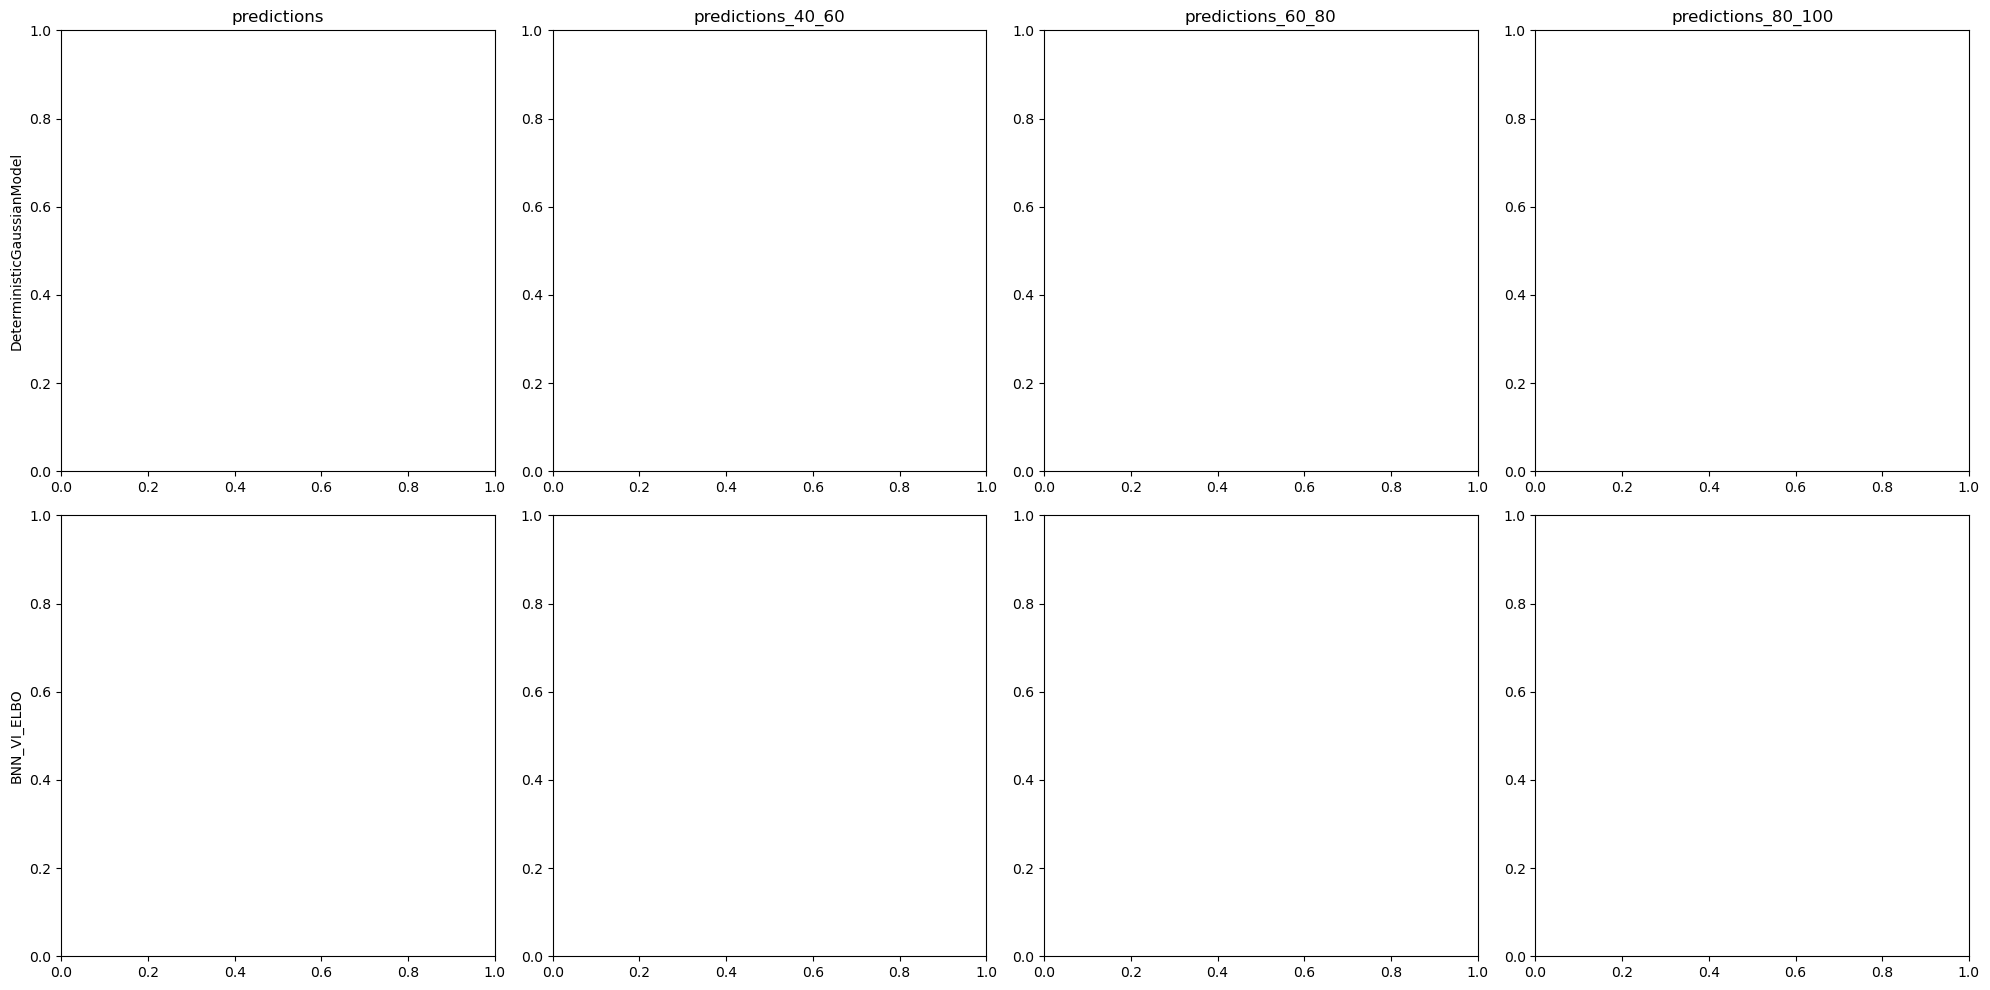

In [27]:
uq_methods_to_show = [
    'DeterministicGaussianModel', 
    # 'QuantileRegressionModel',
    # 'MCDropoutModel', 
    'BNN_VI_ELBO', 
    # 'DERModel', 
    # 'BaseModel'
]

lat_min, lat_max = 24.396308, 49.384358
lon_min, lon_max = -125.000000, -66.934570
fig, axs = plt.subplots(nrows=len(uq_methods_to_show), ncols=4, figsize=(20, 10))

cmaps = ["Blues", "Greens", "Oranges", "Reds"]

for row_idx, uq_method in enumerate(uq_methods_to_show):
    plot_df = uq_metric_df[uq_metric_df["uqmethod"]==uq_method].copy()
    plot_df.sort_values(by="pred_path", inplace=True)
    plot_df.reset_index(inplace=True)

    # plot each of the splits
    # err_map = 
    # std_map = Basemap(llcrnrlon=lon_min, llcrnrlat=lat_min, urcrnrlon=lon_max, urcrnrlat=lat_max, resolution='l', ax=axs[row_idx, 1])
    for col_idx, row in plot_df.iterrows():
        split_basemap = Basemap(llcrnrlon=lon_min, llcrnrlat=lat_min, urcrnrlon=lon_max, urcrnrlat=lat_max, resolution='l', ax=axs[row_idx, col_idx])
        split_df = pd.read_csv(row["pred_path"])
        lat_points, lon_points, truth_binned, mse_binned, std_binned = aggregrate_and_bin_data(split_df, agg_scale=0.25)

        # plot mse
        err_map.pcolormesh(lat_points, lon_points, mse_binned, latlon=True, cmap=cmaps[3])
        # fig.colorbar(err_map, ax=axs[row_idx, col_idx])

        # # plot STD
        # std_map.pcolormesh(lat_points, lon_points, std_binned, latlon=True, cmap=cmaps[3])
        # fig.colorbar(std_map, ax=axs[row_idx, 0])

        if row_idx == 0:
            axs[0, col_idx].set_title(row["split"])


    axs[row_idx, 0].set_ylabel(uq_method)

plt.tight_layout()

# Tables

In [28]:
tail_and_gap_uq_df = pd.concat([uq_metric_df, uq_metric_df_gap]).sort_values(by="uqmethod")
tail_and_gap_uq_df = tail_and_gap_uq_df[tail_and_gap_uq_df["split"] != "predictions"]
tail_and_gap_selective_df = pd.concat([selective_df, selective_df_gap]).sort_values(by="uqmethod")
tail_and_gap_selective_df = tail_and_gap_selective_df[tail_and_gap_selective_df["split"] != "predictions"]


diff_df = pd.DataFrame()

# Iterate over each column in the dataframes
for column in tail_and_gap_uq_df.columns:
    # Check if the column contains numerical values
    if pd.api.types.is_numeric_dtype(tail_and_gap_uq_df[column]):
        # Assign the difference to the new dataframe
        diff_df[column] = tail_and_gap_uq_df[column] - tail_and_gap_selective_df[column]
    else:
        # If the column contains non-numerical values, assign the values from df1 to the new dataframe
        diff_df[column] = tail_and_gap_uq_df[column]

display(diff_df)

nll      crps     check  interval       rms_cal        ma_cal  \
21  -0.070578 -0.002106 -0.001054 -0.031266 -1.729352e-02 -1.540516e-02   
26  -6.228424  0.005368  0.002836 -0.069366  0.000000e+00  0.000000e+00   
25  -0.916158  0.005894  0.003073 -0.047262 -3.468296e-04 -2.256663e-04   
24  -3.139300  0.001785  0.001039 -0.102675  0.000000e+00  0.000000e+00   
40        NaN       NaN       NaN       NaN           NaN           NaN   
41        NaN       NaN       NaN       NaN           NaN           NaN   
42        NaN       NaN       NaN       NaN           NaN           NaN   
17        NaN       NaN       NaN       NaN           NaN           NaN   
15  -0.036790 -0.006372 -0.003215 -0.025775 -2.811119e-02 -2.786113e-02   
22  -0.887952  0.045335  0.022990  0.206508  0.000000e+00  0.000000e+00   
21  -0.000219  0.039377  0.019898  0.182462  1.536073e-03  1.103651e-03   
20  -0.283906  0.045405  0.023009  0.215489 -1.556168e-05 -8.991682e-06   
3    0.083925  0.061963  0.031280  0.443371  1.742562e-02  1.584354e-02   
30  -0.013263 -0.002107 -0.001069  0.020900 -1.897263e-02 -1.639049e-02   
28   0.020989  0.023984  0.012103  0.223442 -1.764211e-02 -1.296533e-02   
29   0.051607  0.051395  0.025944  0.368480  7.282791e-03  5.437100e-03   
9    0.010932 -0.000642 -0.000326  0.013188  1.593765e-02  1.509198e-02   
6   -4.853819  0.013921  0.007344 -0.172384  0.000000e+00  0.000000e+00   
5   -0.189245  0.024755  0.012592  0.021739 -1.068497e-03 -7.214409e-04   
4   -1.401894  0.026768  0.013734 -0.012360 -7.786370e-06 -4.496403e-06   
38   0.191181  0.046440  0.023267  0.446677  0.000000e+00  0.000000e+00   
37   0.035694  0.013064  0.006575  0.109837  8.395298e-05  8.352056e-05   
36   0.071051  0.020747  0.010402  0.193047 -6.494725e-07 -3.743258e-07   
11   0.024891  0.008564  0.004325  0.038503 -9.030386e-03 -8.087823e-03   
13  -0.040285 -0.003559 -0.001793 -0.014618 -2.941577e-02 -2.850923e-02   
32  -0.495687  0.051027  0.025830  0.267188 -1.363899e-05 -7.868705e-06   
34  -1.373216  0.052186  0.026455  0.245905  0.000000e+00  0.000000e+00   
33  -0.074108  0.038931  0.019693  0.172806 -5.950649e-04 -4.268137e-04   
18  -0.882773  0.024111  0.012345  0.007910 -7.180976e-06 -4.136505e-06   
17  -0.048730  0.007327  0.003717  0.005837 -3.206663e-03 -2.341484e-03   
16  -0.297036  0.013175  0.006745 -0.006950 -3.031261e-04 -1.813534e-04   
7   -0.000990  0.001111  0.000562  0.003150 -5.732929e-03 -5.163490e-03   
19  -0.360872 -0.000024  0.000012 -0.029137 -1.127973e-02 -9.732443e-03   
12 -16.231777 -0.004031 -0.001948 -0.098573  0.000000e+00  0.000000e+00   
13  -5.480023  0.000960  0.000546 -0.045210 -1.603185e-04 -9.999429e-05   
14 -27.992014  0.007652  0.003899  0.019200  0.000000e+00  0.000000e+00   
10  -1.637645  0.059383  0.030014  0.353437  0.000000e+00  0.000000e+00   
9   -0.037017  0.050003  0.025257  0.273857  2.692761e-03  2.114916e-03   
8   -0.511712  0.059135  0.029879  0.358960 -2.466657e-06 -1.372902e-06   
5   -0.094354 -0.009084 -0.004578 -0.053690 -3.260708e-02 -3.069936e-02   
2  -43.801890 -0.083117 -0.041292 -1.090341  0.000000e+00  0.000000e+00   
1   -7.771525 -0.067265 -0.033519 -0.829452 -1.277229e-02 -1.000558e-02   
1   -1.069785  0.029318  0.014814  0.158522  7.455910e-03  6.634578e-03   
0  -22.679517 -0.084225 -0.041854 -1.096736 -3.964919e-05 -2.360612e-05   

     miscal_area     sharp       mae      rmse      mdae     marpd        r2  \
21 -1.556077e-02  0.018858 -0.000725 -0.000235 -0.002027  0.184352  0.003277   
26  0.000000e+00  0.014485  0.012510  0.013611  0.012265  0.373739 -0.242138   
25 -2.279458e-04  0.012729  0.012182  0.013427  0.014571  0.603400 -0.197787   
24  0.000000e+00  0.013898  0.008689  0.008559  0.005999  0.055064 -0.382117   
40           NaN       NaN  0.000000  0.000000  0.000000  0.000000  0.000000   
41           NaN       NaN  0.000000  0.000000  0.000000  0.000000  0.000000   
42           NaN       NaN  0.000000  0.000000  0.000000  0.000000  0.0000

In [29]:
def generate_latex_table_for_metric(df, metric="rmse"):
    data_df = pd.pivot_table(df[df["uqmethod"]!="BaseModel"], values=metric, index="uqmethod", columns="split").reset_index()
    data_df.columns = data_df.columns.str.replace("predictions", metric)

    pivot_table_rounded = data_df.round(3)

    # Find the maximum value per column
    max_values = pivot_table_rounded.max()

    def format_max_value(x):
        if pd.api.types.is_numeric_dtype(x) and x == x.max():
            return "\\textbf{" + str(x) + "}"
        return str(x)

    # Apply the formatting function to the pivot table dataframe
    pivot_table_latex = pivot_table_rounded.applymap(format_max_value)

    latex_output = pivot_table_latex.to_latex(escape=False, index=False)

    for column in max_values.index:
        latex_output = latex_output.replace(str(max_values[column]), "\\textbf{" + str(max_values[column]) + "}")
        latex_column = column.replace('_', '\\_')
        latex_output = latex_output.replace(column, latex_column)
        # latex_output = latex_output.replace("predictions", metric)

    # Output the LaTeX representation of the pivot table
    return latex_output

latex_table1 = generate_latex_table_for_metric(tail_and_gap_uq_df)
latex_table2 = generate_latex_table_for_metric(tail_and_gap_selective_df)
latex_table3 = generate_latex_table_for_metric(diff_df)


print(latex_table3)

\begin{tabular}{lllll}
\toprule
uqmethod & rmse\_40\_60 & rmse\_60\_80 & rmse\_80\_100 & rmse\_gap \\
\midrule
BNN_VI_ELBO & 0.013 & 0.009 & 0.014 & -0.0 \\
CQR & 0.059 & 0.064 & 0.064 & -0.012 \\
DERModel & 0.038 & 0.035 & 0.031 & -0.013 \\
DeepEnsembleModel & 0.043 & 0.048 & 0.034 & -0.007 \\
DeepKernelLearningModel & 0.017 & 0.024 & 0.052 & 0.018 \\
DeterministicGaussianModel & 0.06 & 0.071 & 0.074 & -0.008 \\
LaplaceModel & 0.016 & 0.024 & 0.04 & 0.003 \\
MCDropoutModel & 0.008 & 0.0 & 0.013 & 0.004 \\
QuantileRegressionModel & \textbf{0.072} & \textbf{\textbf{0.081}} & \textbf{\textbf{0.081}} & -0.012 \\
\textbf{SWAGModel} & -0.046 & -0.065 & -0.066 & \textbf{0.049} \\
\bottomrule
\end{tabular}



In [36]:
metric = "interval"
tail_and_gap_selective_df["category"] = "selective"
tail_and_gap_uq_df["category"] = "normal"
diff_df["category"] = "difference"
diff_df

category_columns = ["normal", "selective", "difference"]
splits = ["predictions_40_60", "predictions_60_80", "predictions_80_100", "predictions_gap"]
dfs = [tail_and_gap_uq_df, tail_and_gap_selective_df, diff_df]

columns = pd.MultiIndex.from_product([splits, category_columns])

# Create an empty dataframe with the multi-index column index
combined_df = pd.DataFrame(columns=columns)
combined_df

# combined_df["uqmethod"] = tail_and_gap_selective_df["uqmethod"].unique()
for split in splits:
    for df, category in zip(dfs, category_columns):
        # print(category)
        # print(len(df[df["split"]==split][metric]))
        if category in df.category.unique():
            # print(df[df["split"]==split])
            combined_df[(split, category)] = df[df["split"]==split][metric].reset_index(drop=True)

combined_df.insert(0, ("", "UQ Method"), tail_and_gap_selective_df["uqmethod"].unique())
combined_df= combined_df.round(4)
combined_df = combined_df[combined_df[("", "UQ Method")]!="BaseModel"]
combined_df

predictions_40_60                       \
                     UQ Method            normal selective difference   
0                  BNN_VI_ELBO           14.7806   14.8279    -0.0473   
2                          CQR            7.0499    6.8674     0.1825   
3                     DERModel            6.2272    5.8588     0.3685   
4            DeepEnsembleModel           10.6861   10.6644     0.0217   
5      DeepKernelLearningModel            9.0586    8.9487     0.1098   
6   DeterministicGaussianModel            9.1738    9.0010     0.1728   
7                 LaplaceModel            8.2252    8.2194     0.0058   
8               MCDropoutModel           15.3636   15.4088    -0.0452   
9      QuantileRegressionModel            7.5449    7.2711     0.2739   
10                   SWAGModel           13.2772   14.1067    -0.8295   

   predictions_60_80                      predictions_80_100            \
              normal selective difference             normal selective   
0            30.9434   31.0460    -0.1027            46.8897   46.9591   
2            21.6780   21.4625     0.2155            37.1139   36.9074   
3             8.8142    8.5907     0.2234            12.8831   12.8622   
4            25.6533   25.6657    -0.0124            40.3285   40.5009   
5            24.4655   24.2724     0.1930            40.4385   39.9918   
6            24.6372   24.3700     0.2672            40.3407   40.0948   
7            23.3531   23.3600    -0.0069            38.6719   38.6640   
8            31.0251   31.1236    -0.0986            46.4435   46.4243   
9            22.0808   21.7218     0.3590            37.1880   36.8346   
10           29.0047   30.1014    -1.0967            44.4675   45.5579   

              predictions_gap                       
   difference          normal selective difference  
0     -0.0694          1.5529    1.5841    -0.0313  
2      0.2065          1.4756    1.5014    -0.0258  
3      0.0209          4.2509    3.8076     0.4434  
4     -0.1724          1.3703    1.3571     0.0132  
5      0.4467          1.3539    1.3154     0.0385  
6      0.2459          1.4557    1.4703    -0.0146  
7      0.0079          1.2546    1.2515     0.0032  
8      0.0192          2.1427    2.1719    -0.0291  
9      0.3534          1.7087    1.7624    -0.0537  
10    -1.0903          2.3603    2.2018     0.1585

In [34]:
# Find the maximum value per column
max_values = combined_df.max()
min_values = combined_df.min()

def format_max_value(x):
    if pd.api.types.is_numeric_dtype(x) and x == x.max():
        return "\\textbf{" + str(x) + "}"
    return str(x)

# Apply the formatting function to the pivot table dataframe
pivot_table_latex = combined_df.applymap(format_max_value)

latex_output = pivot_table_latex.to_latex(escape=False, index=False)

for column in max_values.index:
    if "UQ Method" in column[0]:
        continue
    if "difference" in column[1]:
        latex_output = latex_output.replace(str(max_values[column]), "\\textbf{" + str(max_values[column]) + "}")
    else:
        latex_output = latex_output.replace(str(min_values[column]), "\\textbf{" + str(min_values[column]) + "}")

# Output the LaTeX representation of the pivot table
latex_output = latex_output.replace("_", "\\_")
latex_output = latex_output.replace("\multicolumn{3}{r}", "\multicolumn{3}{c}")
latex_output = latex_output.replace("difference", "difference $\downarrow$")
latex_output = latex_output.replace("down", "up")
latex_output = latex_output.replace("normal", "normal $\downarrow$")
latex_output = latex_output.replace("selective", "selective $\downarrow$")
latex_output = latex_output.replace("Model", "")

print(latex_output)

\begin{tabular}{lllllllllllll}
\toprule
 & \multicolumn{3}{c}{predictions\_40\_60} & \multicolumn{3}{c}{predictions\_60\_80} & \multicolumn{3}{c}{predictions\_80\_100} & \multicolumn{3}{c}{predictions\_gap} \\
UQ Method & normal $\downarrow$ & selective $\downarrow$ & difference $\uparrow$ & normal $\downarrow$ & selective $\downarrow$ & difference $\uparrow$ & normal $\downarrow$ & selective $\downarrow$ & difference $\uparrow$ & normal $\downarrow$ & selective $\downarrow$ & difference $\uparrow$ \\
\midrule
\textbf{BNN\_VI\_ELBO} & 20.8711 & 21.7873 & -0.9162 & 61.4973 & 64.6366 & -3.1393 & 121.9261 & 128.1546 & -6.2284 & 1.2891 & 1.3597 & -0.0706 \\
CQR & 3.5614 & 3.5617 & -0.0002 & 11.2988 & 11.5827 & -0.2839 & 23.9616 & 24.8496 & -0.888 & 0.9867 & 1.0235 & -0.0368 \\
DER & \textbf{2.2445} & \textbf{2.1929} & \textbf{0.0516} & \textbf{2.6398} & \textbf{2.6188} & 0.021 & \textbf{3.1427} & \textbf{3.156} & -0.0133 & 1.7983 & 1.7144 & \textbf{0.0839} \\
DeepEnsemble & 6.402 & 6.5913 